<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Осмотр-данных" data-toc-modified-id="Осмотр-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Осмотр данных</a></span></li><li><span><a href="#Сравнение-средних-значений-признаков-в-двух-группах" data-toc-modified-id="Сравнение-средних-значений-признаков-в-двух-группах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение средних значений признаков в двух группах</a></span></li><li><span><a href="#Графический-анализ-признаков-двух-групп" data-toc-modified-id="Графический-анализ-признаков-двух-групп-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Графический анализ признаков двух групп</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Матрица корреляций</a></span></li><li><span><a href="#Анализ-аномальных-значений" data-toc-modified-id="Анализ-аномальных-значений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ аномальных значений</a></span></li></ul></li><li><span><a href="#Построение-моделей-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-моделей-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение моделей прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Определение-количества-кластеров" data-toc-modified-id="Определение-количества-кластеров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Определение количества кластеров</a></span></li><li><span><a href="#Обучение-модели-кластеризации" data-toc-modified-id="Обучение-модели-кластеризации-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение модели кластеризации</a></span></li><li><span><a href="#Расчет-метрики-кластеризации" data-toc-modified-id="Расчет-метрики-кластеризации-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Расчет метрики кластеризации</a></span></li><li><span><a href="#Анализ-признаков-кластеров" data-toc-modified-id="Анализ-признаков-кластеров-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ признаков кластеров</a></span></li></ul></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></div>

# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Нашими основными задачами на основе данных о клиентах фитнесс-центров являются:

- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

## Загрузка данных

Первоначально импортируем необходимые библиотеки, сохраняем их в переменные, улучшаем качество изображения графиков и т.д.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn() # убираем предупреждения
    
%config InlineBackend.figure_format = 'retina' # улучшение четкости изображения

pd.set_option('display.max_columns', None) # уберем ограничение на вывод количества столбцов
pd.set_option("max_colwidth", 110) # установим максимальную ширину символов в столбце

Сохраним в переменную и выведем датафрейм.

In [2]:
# чтение файла с данными и сохранение в переменную 'df'
try:
    df = pd.read_csv('/datasets/gym_churn.csv') 
except:
    df = pd.read_csv(r'D:\datasets/gym_churn.csv')


df # посмотрим

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


**Таблица df**

Данные клиента за предыдущий до проверки факта оттока месяц:

- `Churn` — факт оттока в текущем месяце;
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

In [3]:
# уберем заглавные буквы в названиях столбцов
df = df.rename(str.lower, axis='columns')

df.columns # проверим

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

## Исследовательский анализ данных (EDA)

### Осмотр данных

Первоначально посмотрим на датасет методом `info()`.

In [4]:
df.info() # посмотрим информацию о таблице методом 'info()'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


**Наблюдения:**

- в основном признаки - **категориальные**;
- столбец **gender** - пол: не будем устанавливать какому полу соответствуют значения **1** и **0**;
- значения бинарных категориальных столбцов: **1** определяем как - **да**, **0** - **нет**;
- пропущенных значений нет;
- тип данных в столбцах соответствует действительности;
- необходимо проверить данные на явные дубликаты.

In [5]:
# проверим данные на явные дубликаты
df.duplicated().sum()

0

Применим метод **describe**, чтобы посмотреть среднее, медианное значения и стандартное отклонение.

In [6]:
# применим методом 'desctibe()'
df.describe().loc[['50%', 'mean', 'std']].T

,50%,mean,std
gender,1.000000,0.510250,0.499957
near_location,1.000000,0.845250,0.361711
partner,0.000000,0.486750,0.499887
promo_friends,0.000000,0.308500,0.461932
phone,1.000000,0.903500,0.295313
contract_period,1.000000,4.681250,4.549706
group_visits,0.000000,0.412250,0.492301
age,29.000000,29.184250,3.258367
avg_additional_charges_total,136.220159,146.943728,96.355602
month_to_end_contract,1.000000,4.322750,4.191297


**Промежуточные выводы:**

- среднестатистический клиент, обычно живет или работает в одном районе с фитнесс-центром, сроку годности его абонемента ещё **5** месяцев, ему **29** лет, он потратил **147** у.е. на услуги фитнес-центра и он обычно занимается **2** раза в неделю;
- в таблице отсутствуют явные дубликаты;
- метод `describe()` показал высокое стандартное отклонение в столбцах **avg_additional_charges_total**, **month_to_end_contract**, **lifetime**, **contract_period**, что указывает на то, что данные распределены по большому диапазону значений.

### Сравнение средних значений признаков в двух группах

Посмотрим на средние значения признаков в двух группах - тех, кто ушел в отток и тех, кто остался.

In [7]:
# применим метод 'groupby()'
df.groupby('churn').agg({'median', 'mean', 'std'}).T

churn                                              0           1
gender                            mean      0.510037    0.510839
                                  median    1.000000    1.000000
                                  std       0.499984    0.500118
near_location                     mean      0.873086    0.768143
                                  median    1.000000    1.000000
                                  std       0.332933    0.422217
partner                           mean      0.534195    0.355325
                                  median    1.000000    0.000000
                                  std       0.498914    0.478837
promo_friends                     mean      0.353522    0.183789
                                  median    0.000000    0.000000
                                  std       0.478144    0.387495
phone                             mean      0.903709    0.902922
                                  median    1.000000    1.000000
                                  std       0.295040    0.296204
contract_period                   mean      5.747193    1.728558
                                  median    6.000000    1.000000
                                  std       4.716942    2.132371
group_visits                      mean      0.464103    0.268615
                                  median    0.000000    0.000000
                                  std       0.498795    0.443448
age                               mean     29.976523   26.989632
                                  median   30.000000   27.000000
                                  std       3.009933    2.895163
avg_additional_charges_total      mean    158.445715  115.082899
                                  median  149.881171  103.814686
                                  std      99.801599   77.696419
month_to_end_contract             mean      5.283089    1.662582
                                  median    6.000000    1.000000
                                  std       4.363522    1.964593
lifetime                          mean      4.711807    0.990575
                                  median    4.000000    1.000000
                                  std       3.874780    1.110799
avg_class_frequency_total         mean      2.024876    1.474995
                                  median    2.043252    1.491187
                                  std       1.016006    0.694705
avg_class_frequency_current_month mean      2.027882    1.044546
                                  median    2.046697    0.979445
                                  std       1.018994    0.770237

**Промежуточные выводы:**

- средние значения в столбцах **near_location**, **partner**, **promo_friends** выше в группах, пользователей, которые продолжают заниматься. Соответственно близость расположения, партнерство компании с клубом и акция "приведи друга" положительно влияет на продолжение занятий в фитнес-клубе;
- средний возраст у пользователей, которые перестали ходить в фитнесс-клуб на **3** года меньше, чем у пользователей, продолжающих заниматься;
- средние значения столбца **avg_additional_charges_total**, показали, что пользователи, продолжающие ходить в фитнесс-клуб, приносят больше средней суммарной выручки (на **43** ед.);
- в среднем, пользователи, которые продолжают заниматься чаще ходили в зал, относительно пользователей, которые перестали пользоваться услугами фитнесс-центра.

### Графический анализ признаков двух групп

Построим столбчатые гистограммы признаков для пользователей, кто ушёл и тех, кто остался.

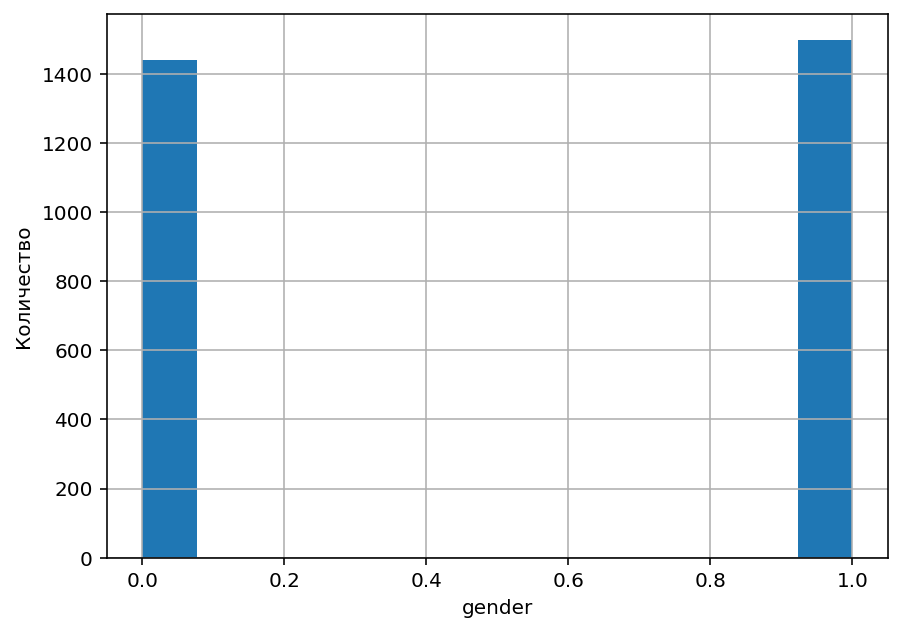

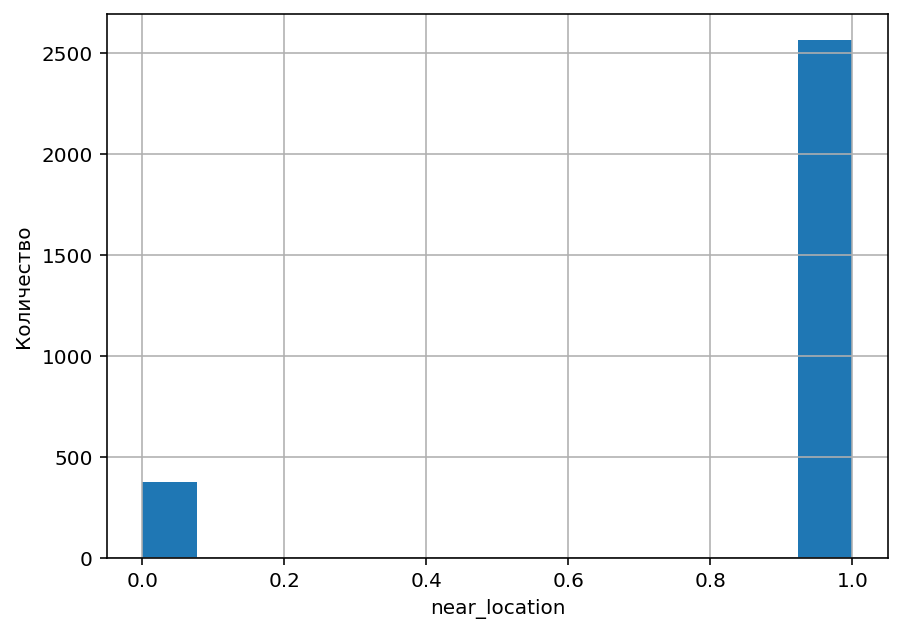

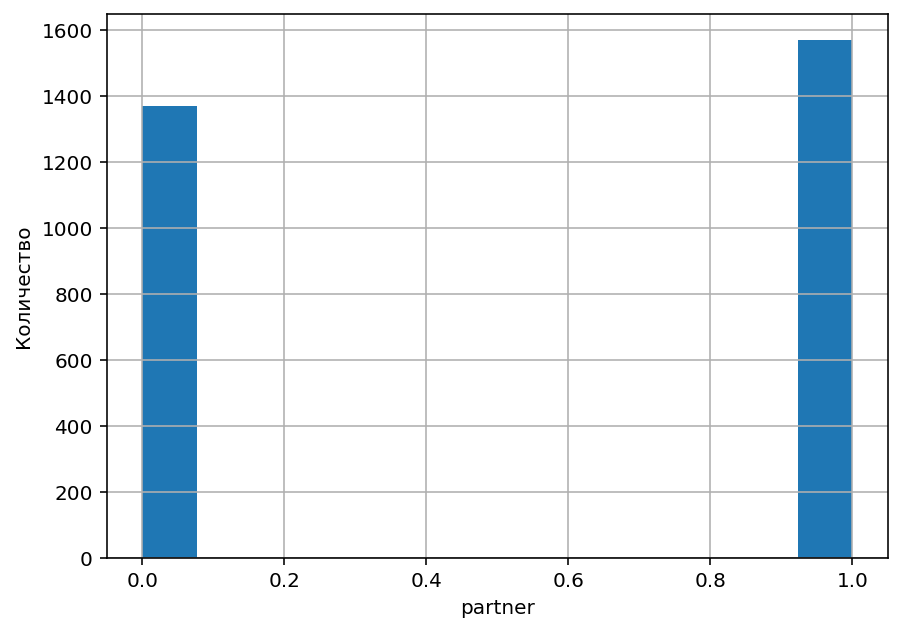

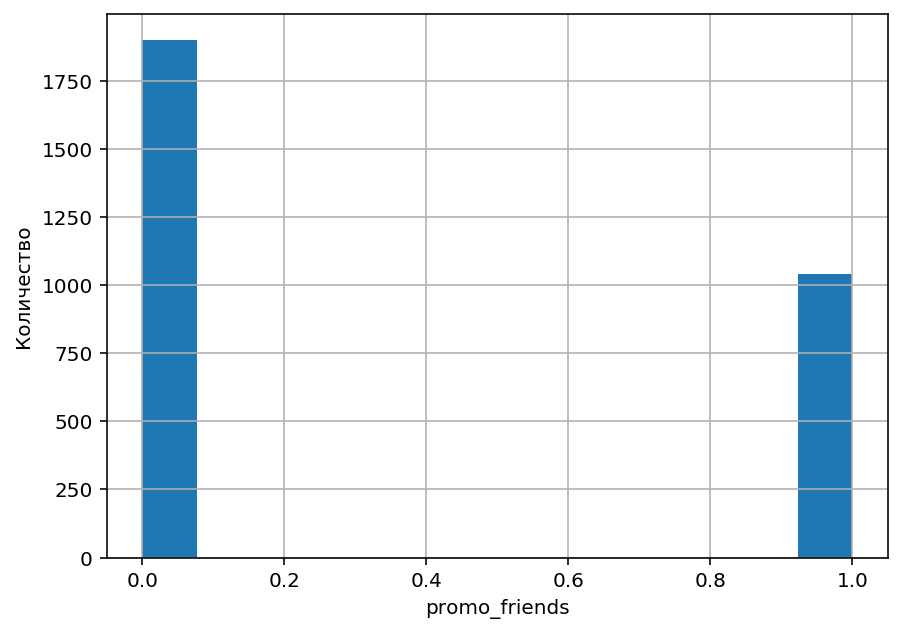

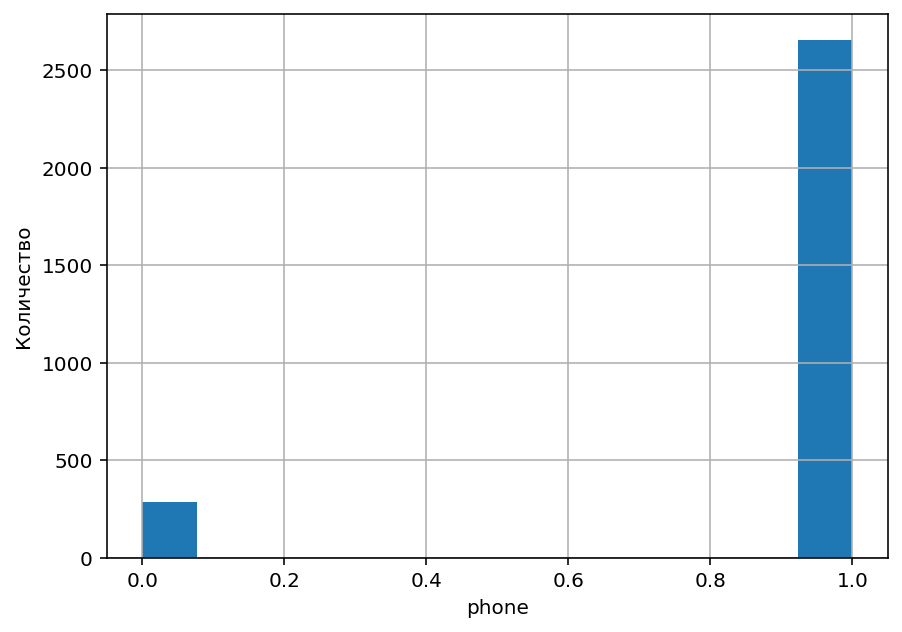

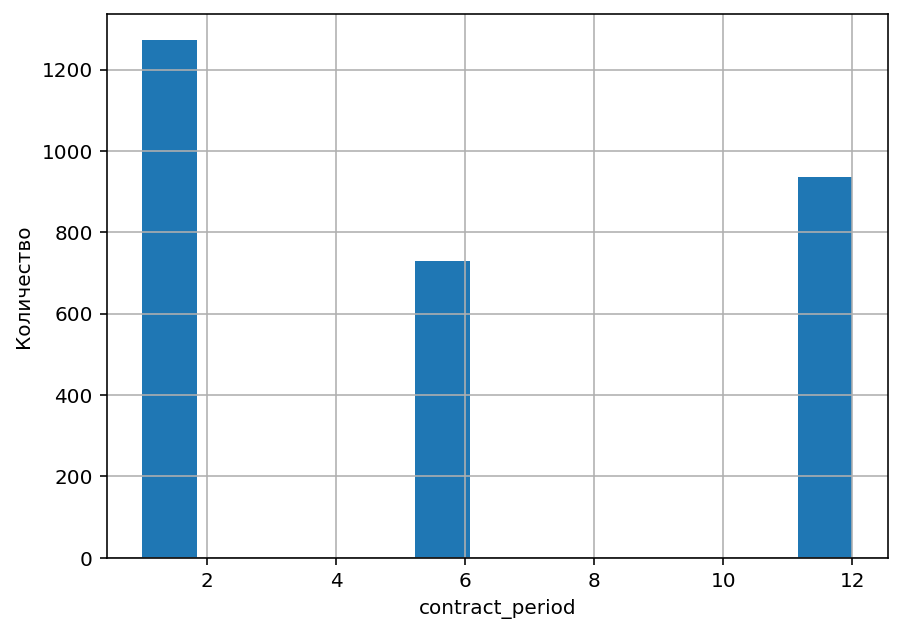

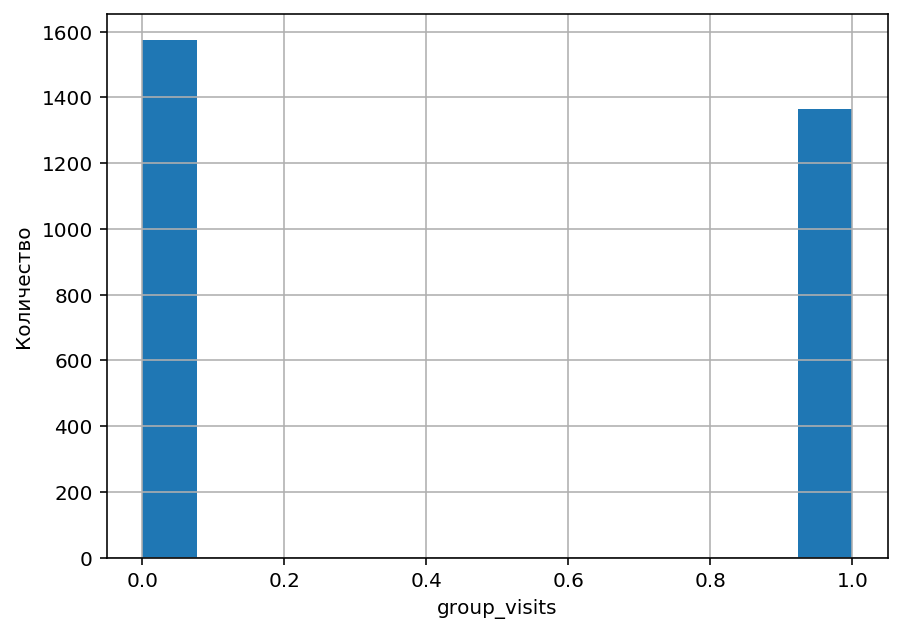

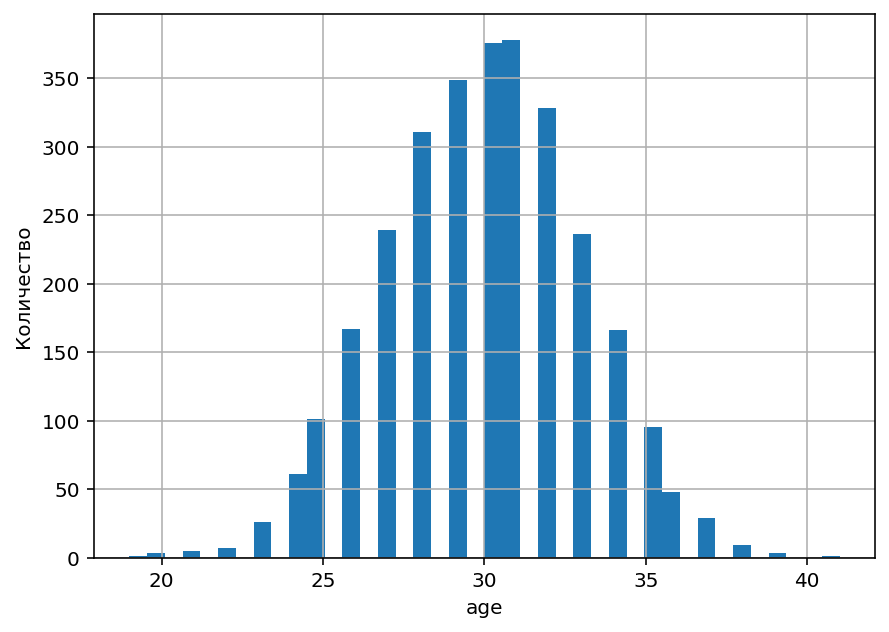

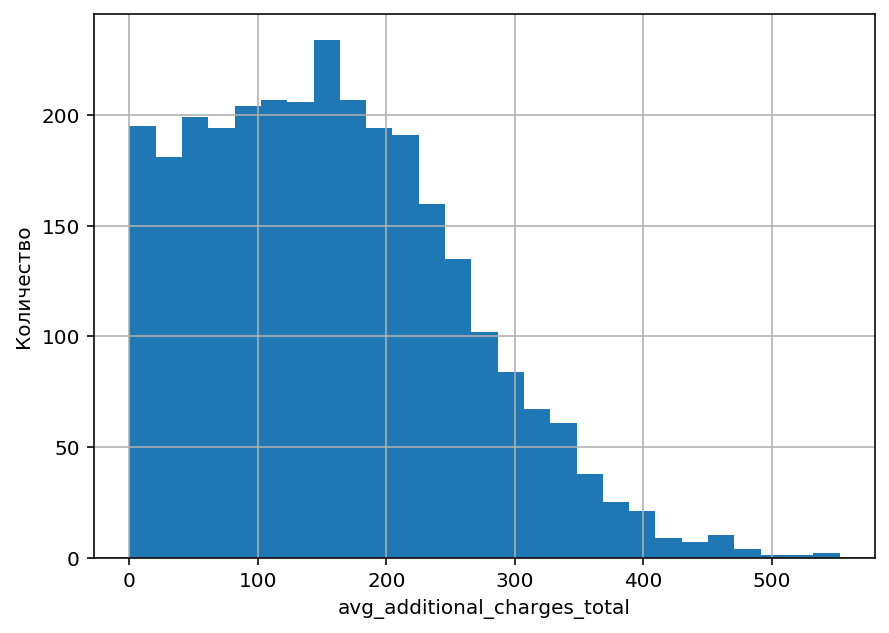

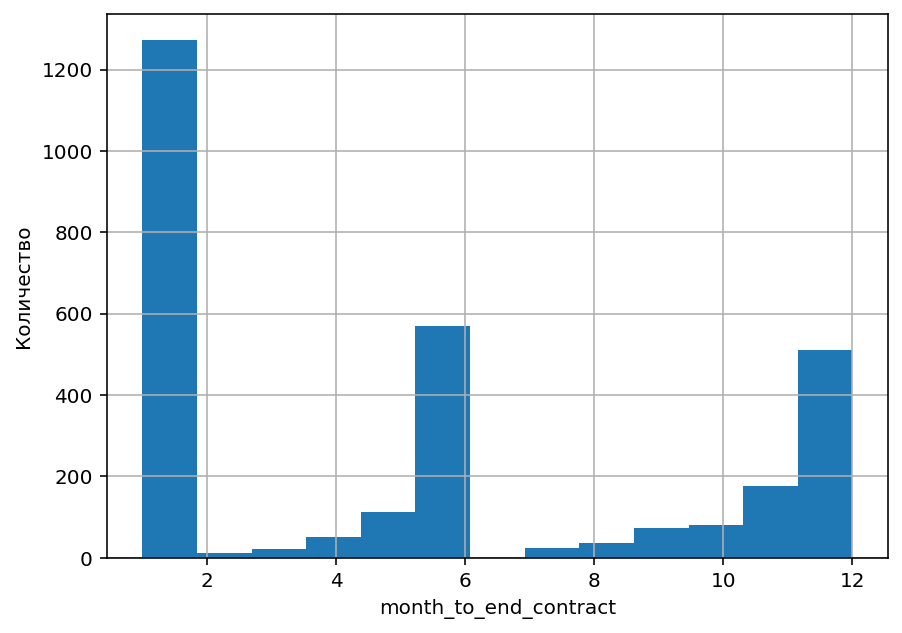

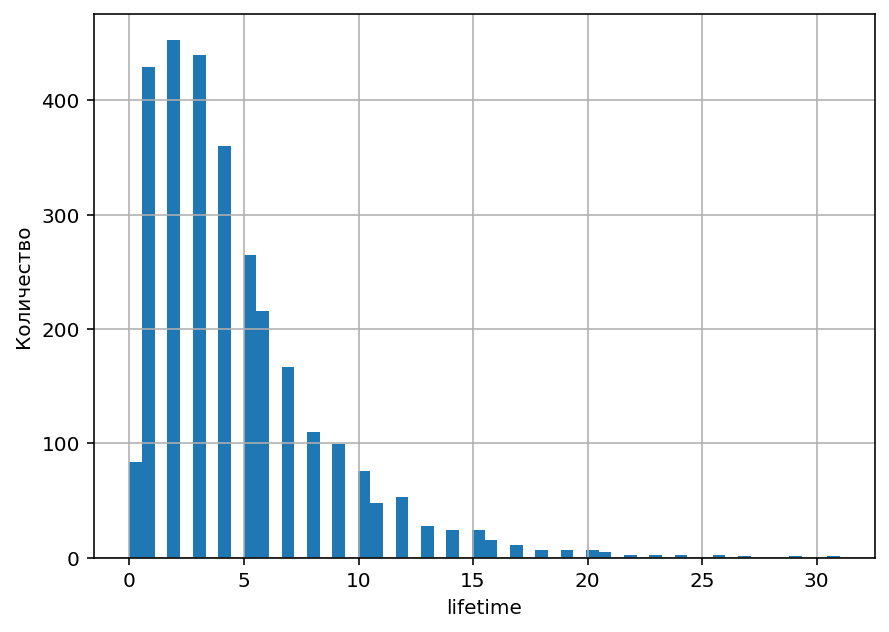

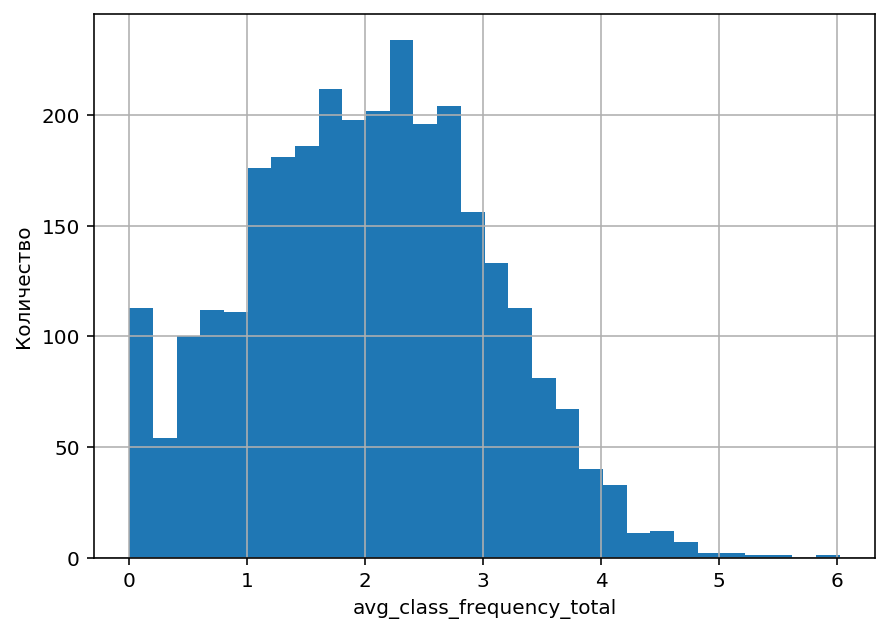

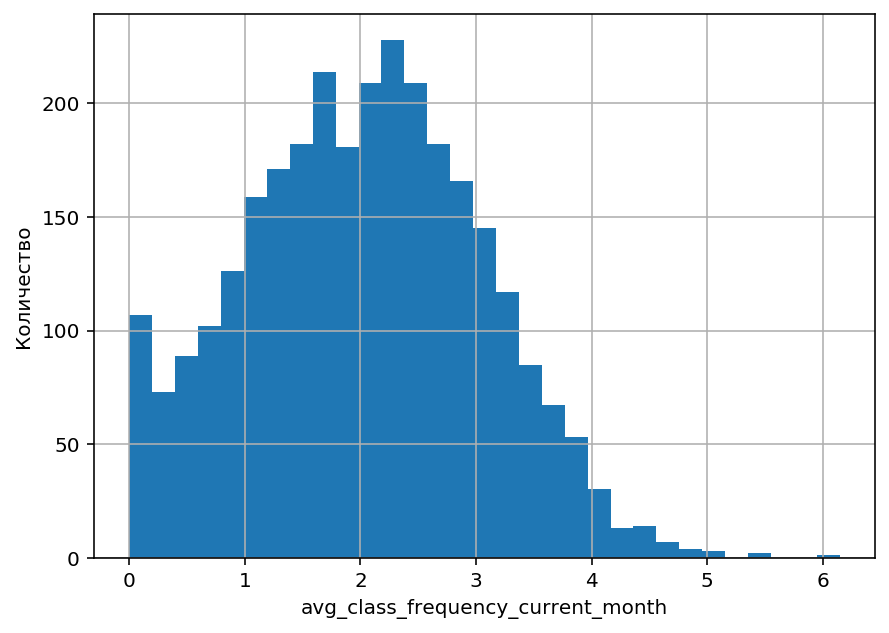

In [8]:
# построим столбчатые гистограммы для пользователей кто остался
for col in df.drop('churn', axis = 1).columns:
    plt.figure(figsize=(7, 5))
    plt.hist(df.query('churn==0')[col], bins='auto')
    plt.grid(which='major', axis='both')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.show()

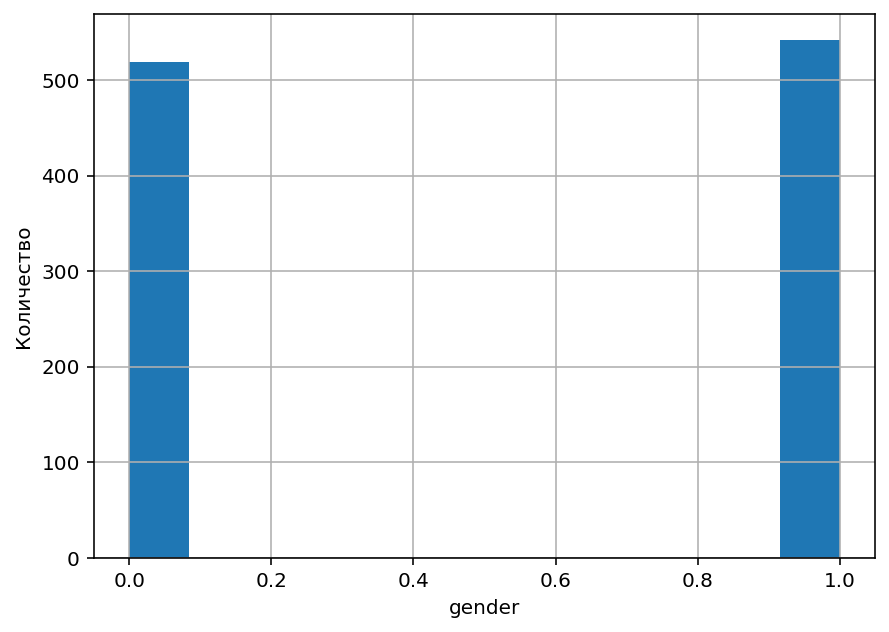

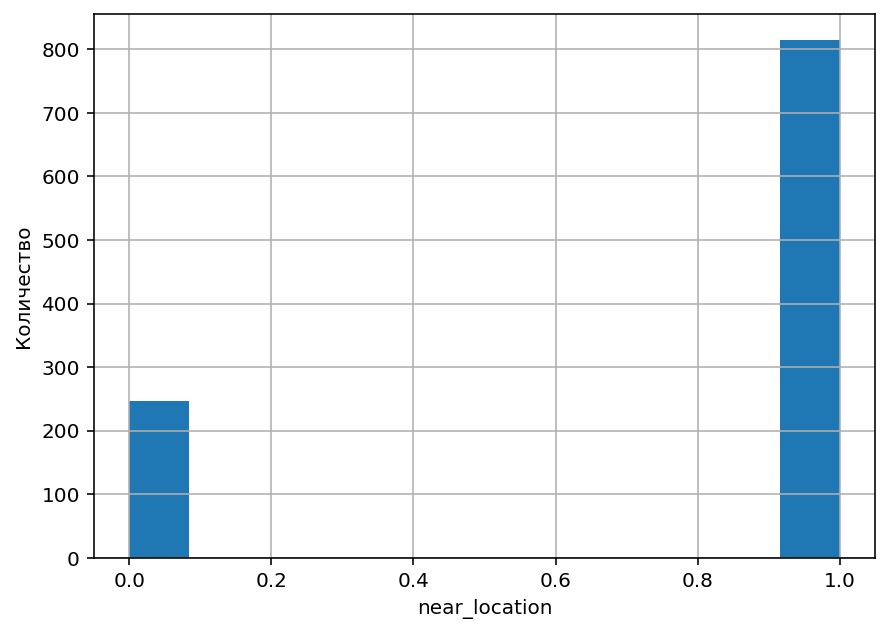

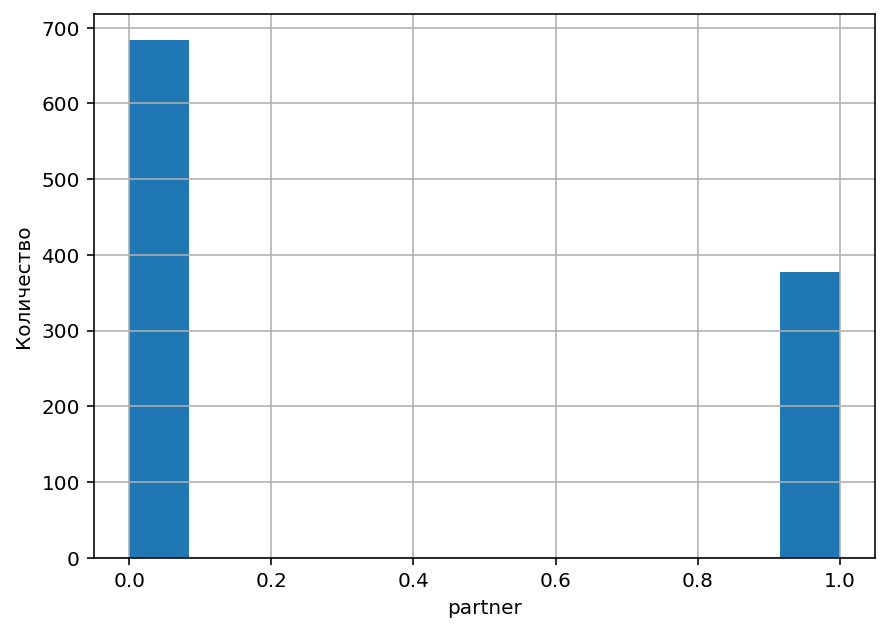

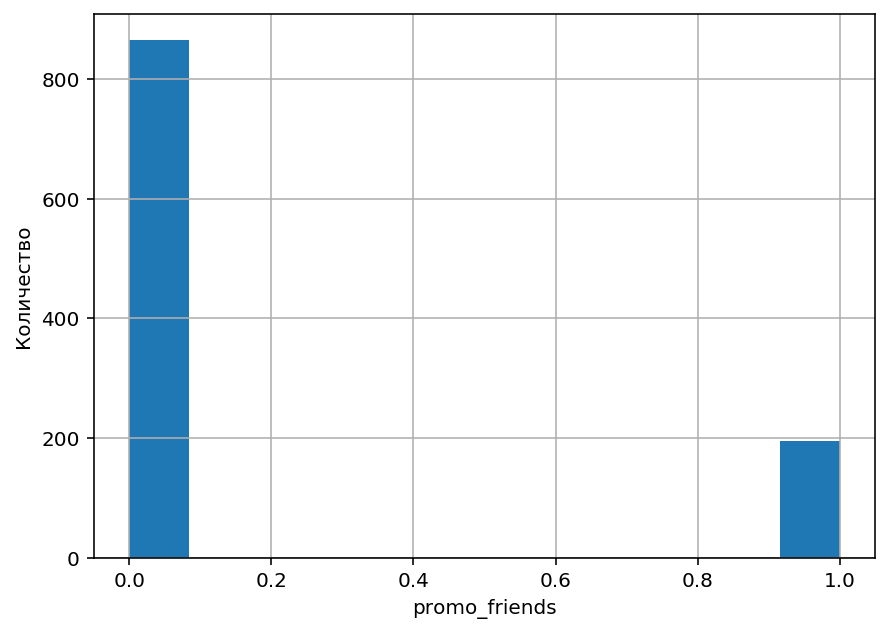

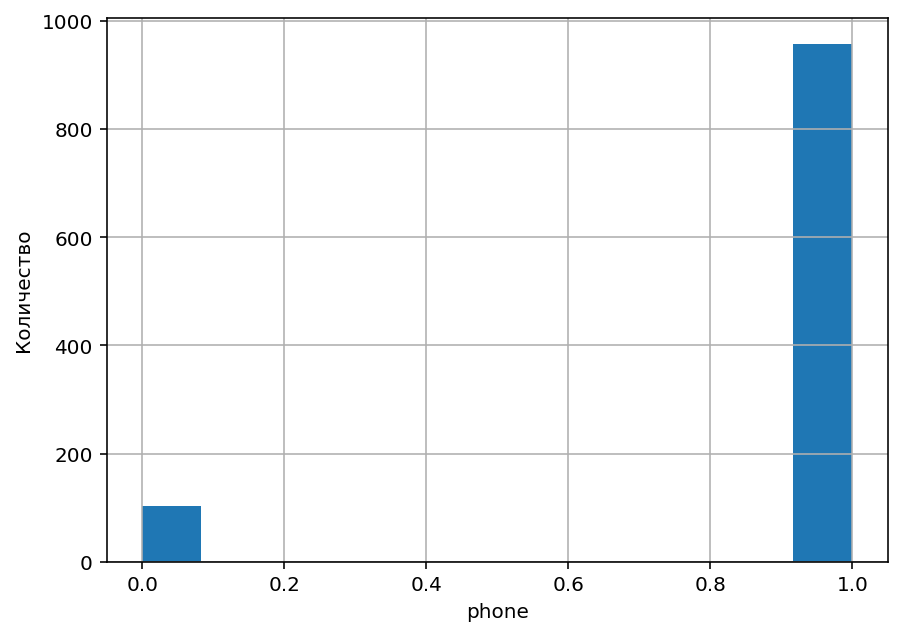

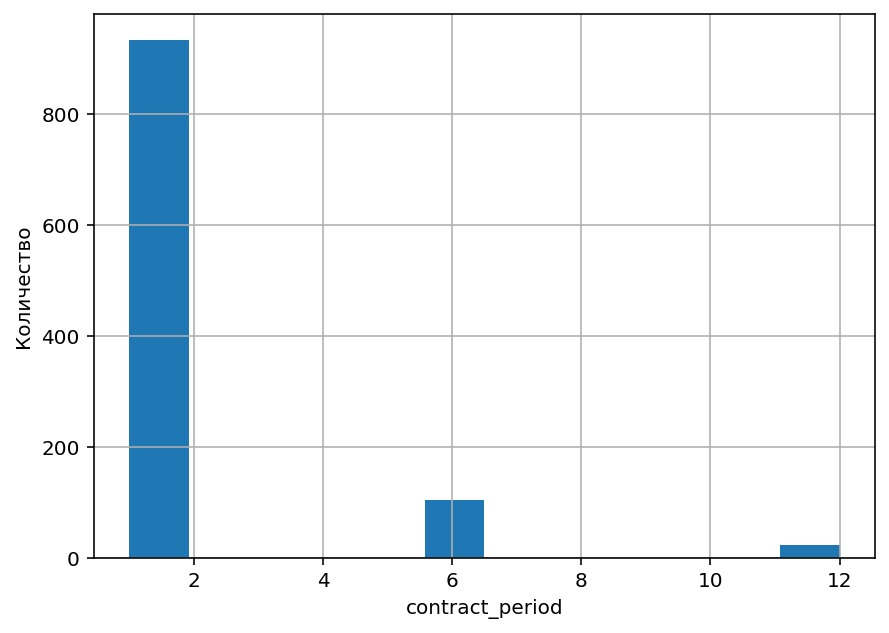

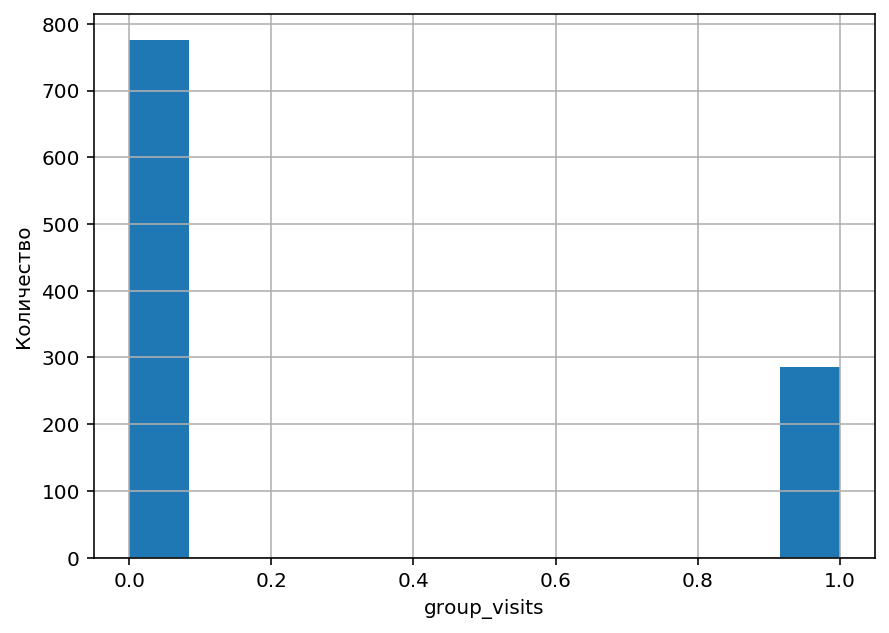

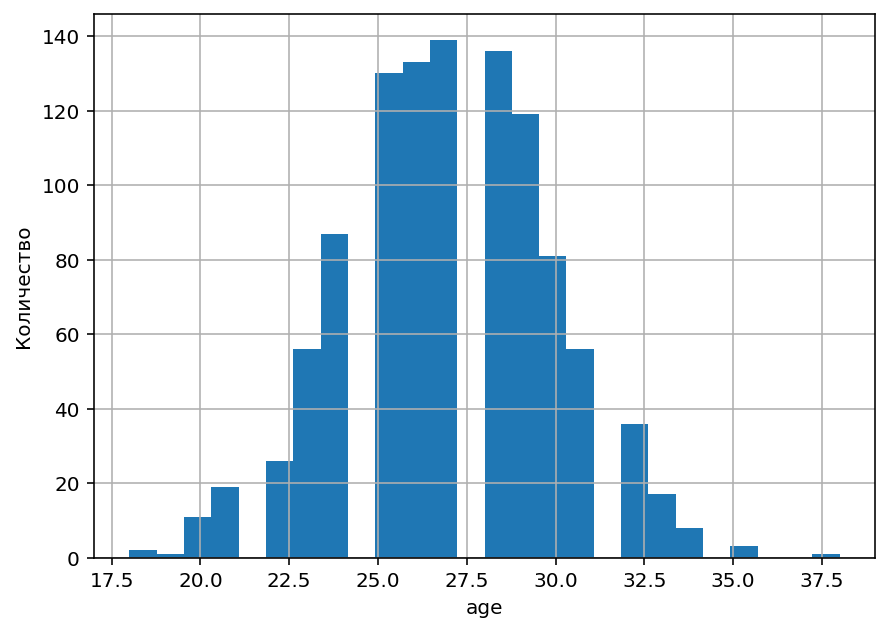

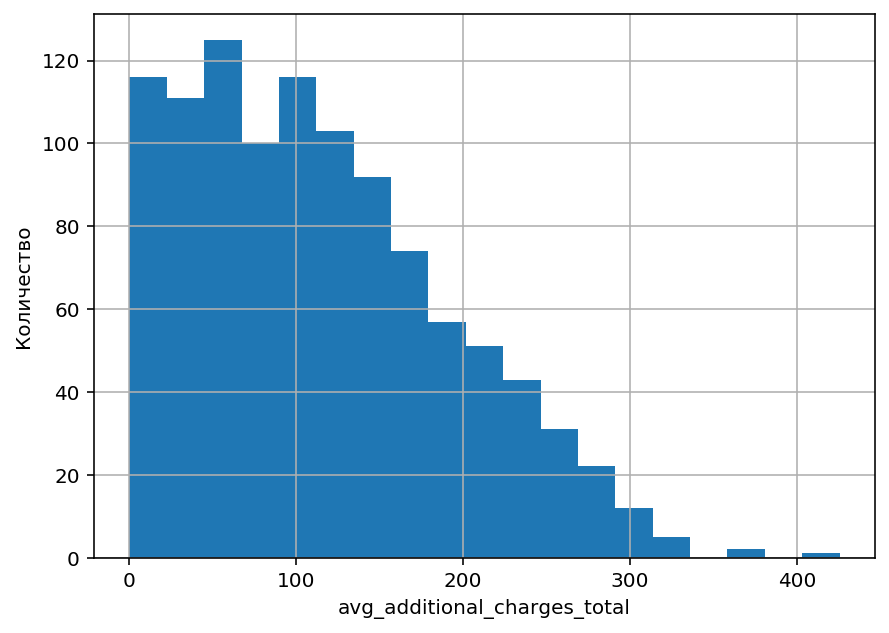

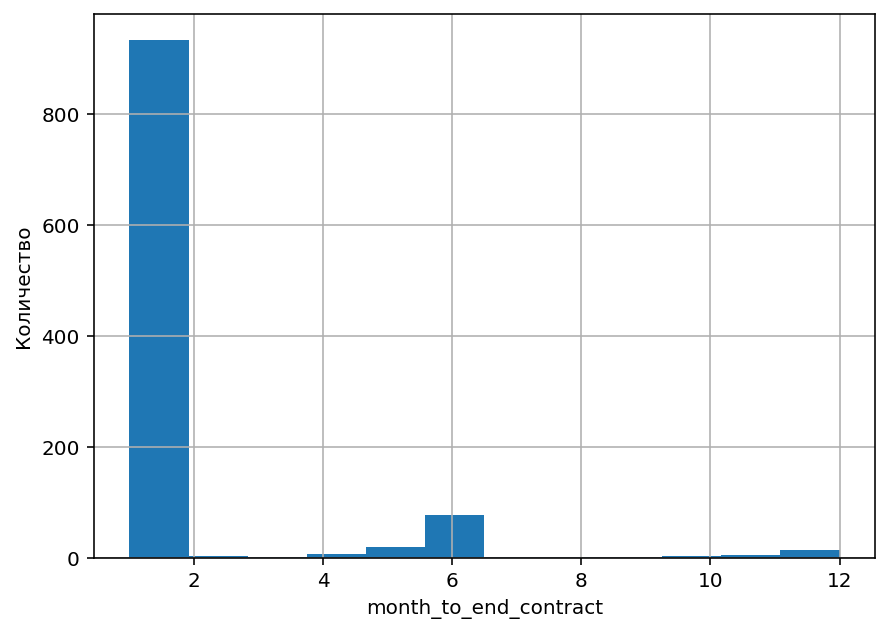

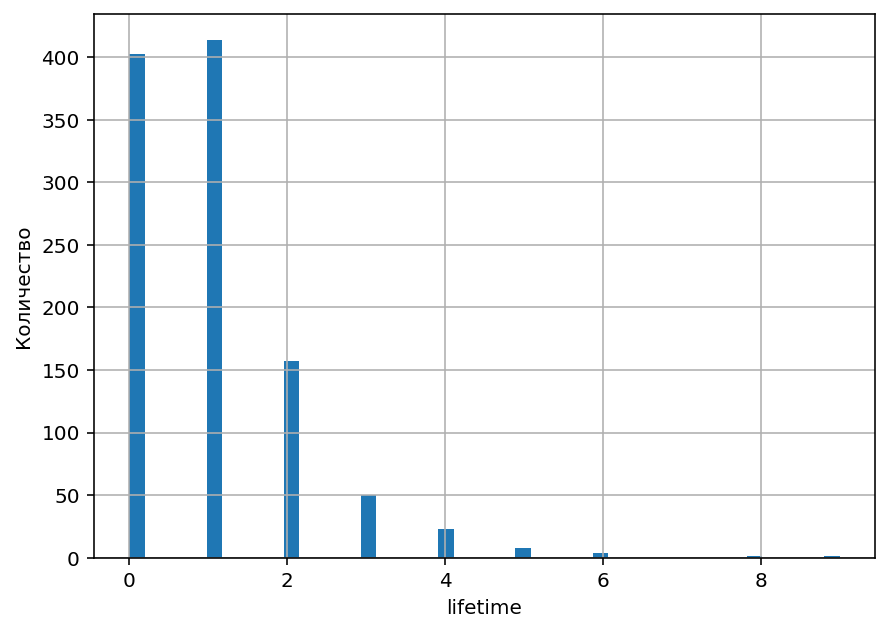

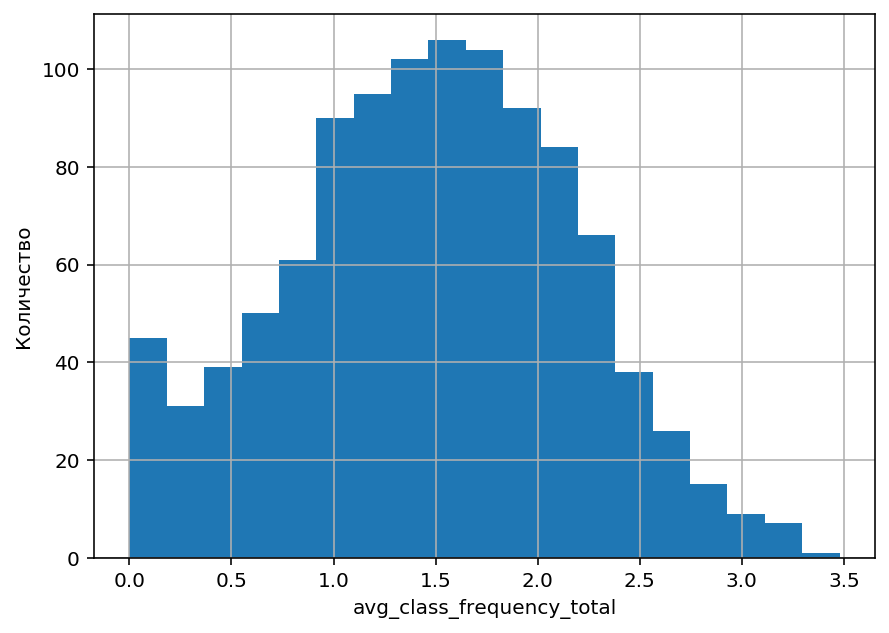

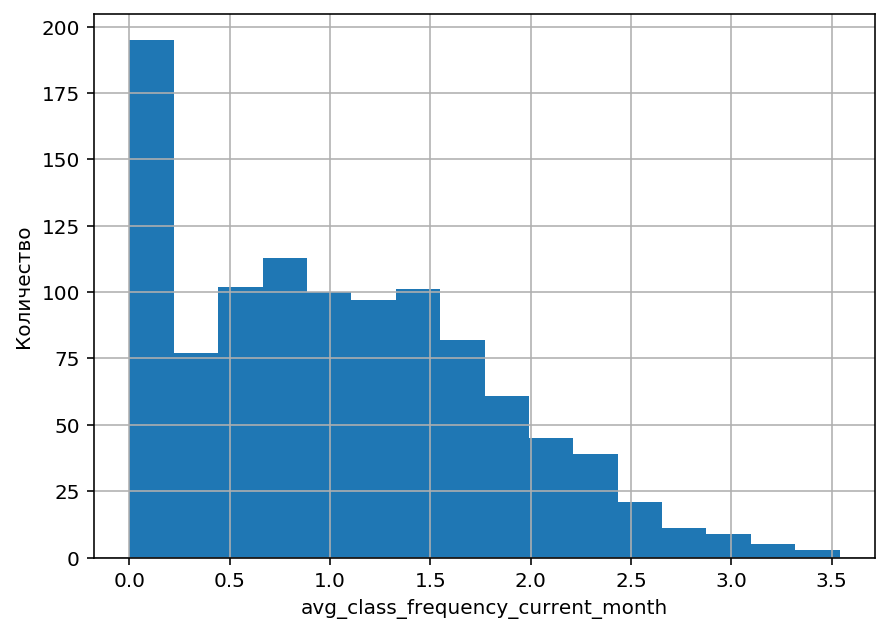

In [9]:
# построим столбчатые гистограммы для пользователей кто ушел
for col in df.drop('churn', axis = 1).columns:
    plt.figure(figsize=(7, 5))
    plt.hist(df.query('churn==1')[col], bins='auto')
    plt.grid(which='major', axis='both')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.show()

**Промежуточные выводы:**

- записей пользователей, которые перестали ходить в фитнесс-зал меньше в **3** раза, относительно записей пользователей, которые продолжают заниматься;
- столбчатые гистограммы показали, что у группы пользователей, которые продолжают заниматься, бо́льшая пропорция значений **1** в столбцах **partner**, **near_location**, **promo_friends** относительно группы кто перестал ходить, что может означать, что данные признаки могут являться важными для сохранения аудитории;
- подавляющее значения поля **contact_period** у пользователей, которые закончили заниматься являются **1** (месяц). У аудитории, продолжающие пользоваться услугами фитнесс-центра данные значения распределены более равномерно;
- пользователи, которые продолжают заниматься в фитнесс-центре приносят больше выручки от других услуг фитнесс-центра;
- возраст обоих групп распределен нормально, но группа людей, которые перестали пользоваться услугами фитнесс-центра на **3** года моложе;
- в среднем, пользователи, которые продолжают заниматься чаще ходили в зал, относительно пользователей, которые перестали пользоваться услугами фитнесс-центра.

### Матрица корреляций

Построим матрицу корреляций.

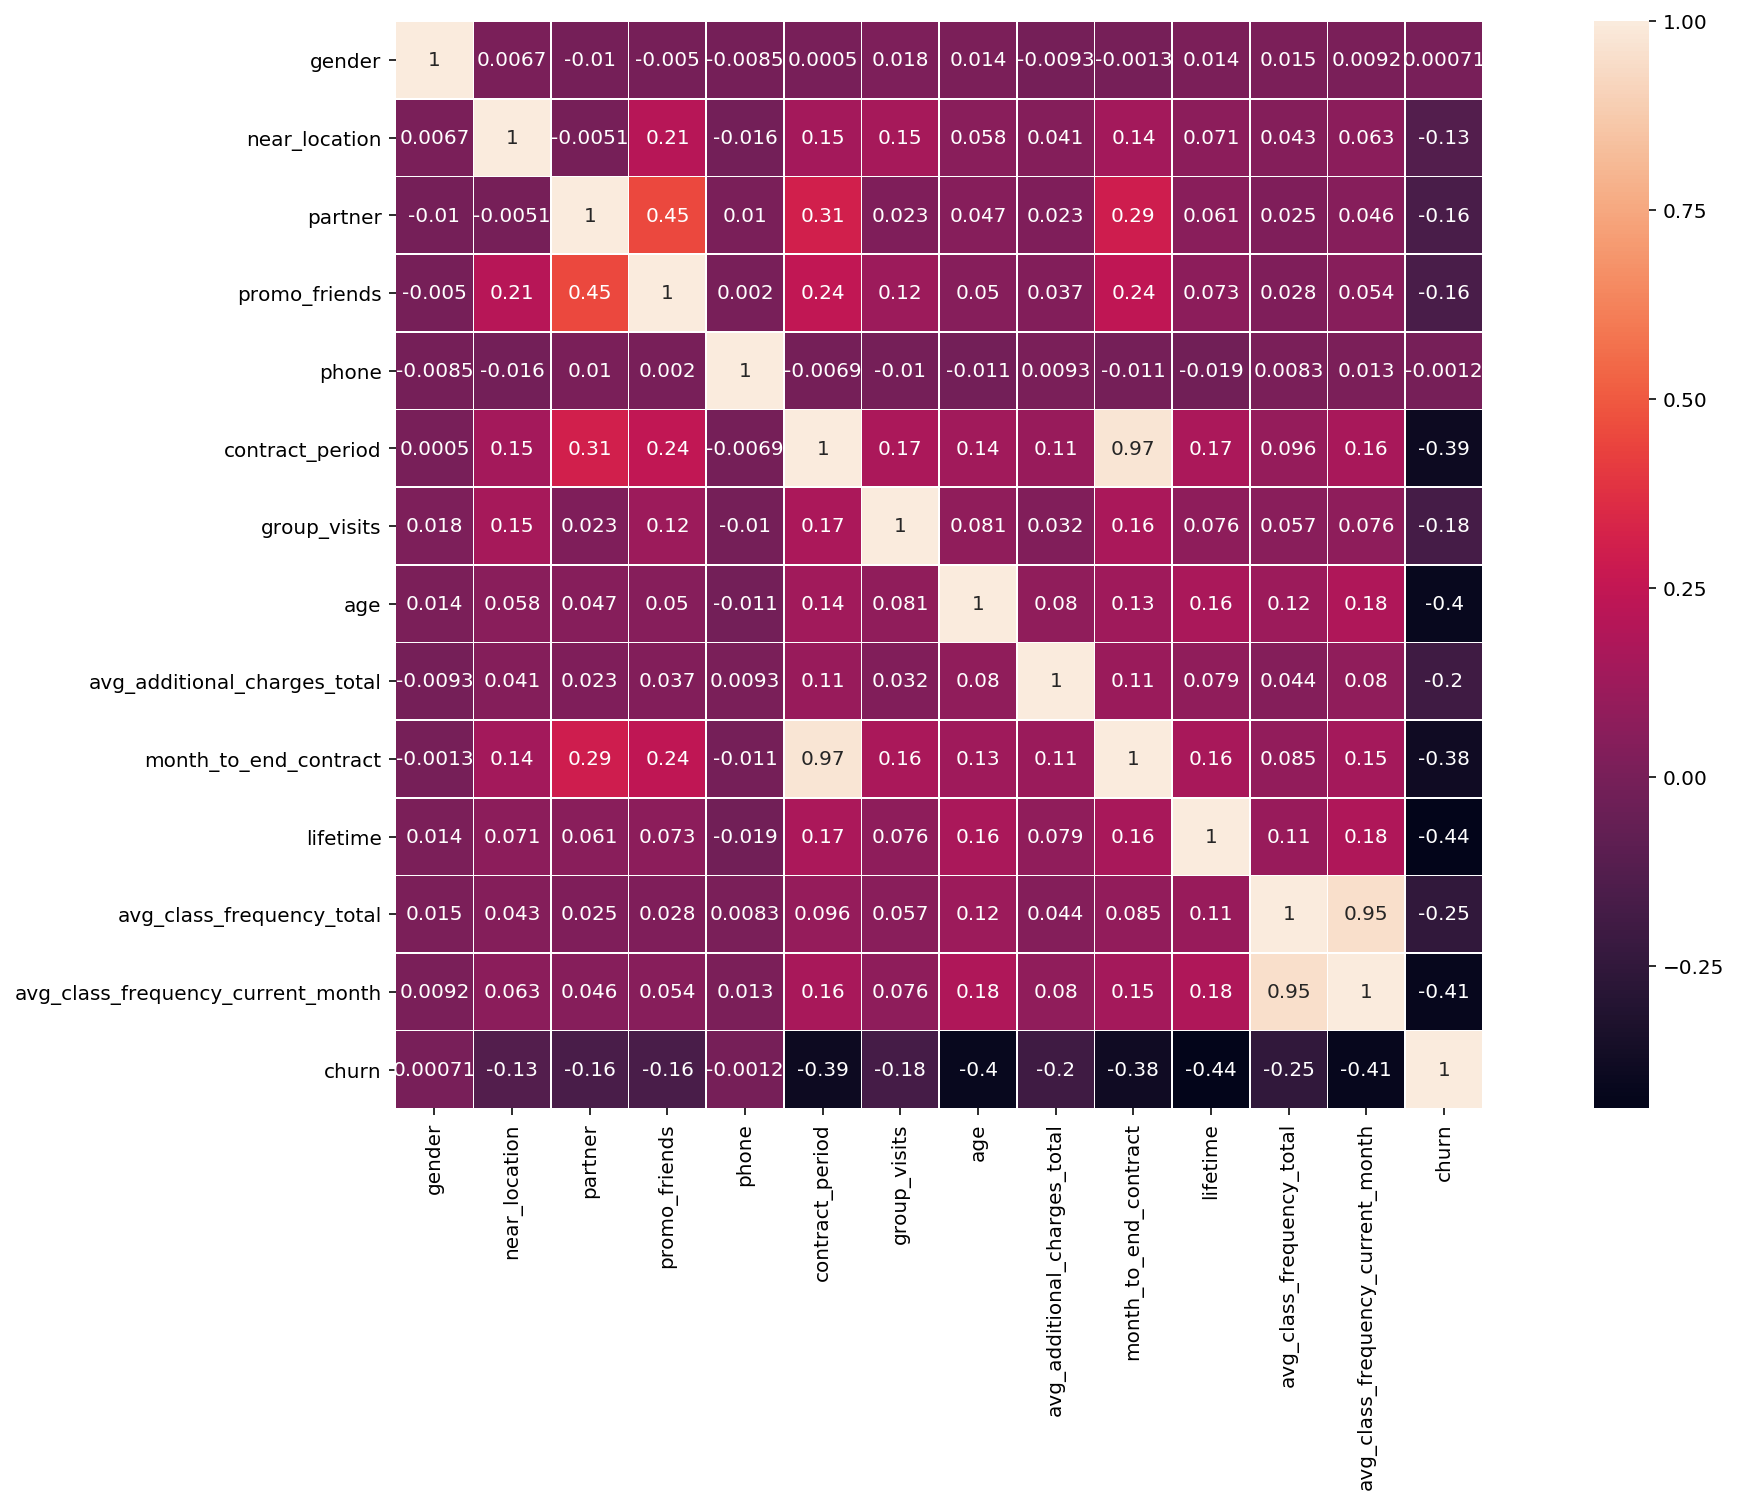

In [10]:
# вычислим матрицу корреляций
cm = df.corr()
fig, ax = plt.subplots(figsize=(20,10))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True, linewidths=.3)

plt.show();

**Промежуточные выводы:**

- целевая переменная (факт оттока клиентов) сильно не взаимосвязана ни с одним из признаков;
- матрица корреляции показала, что наибольшая зависимость между значениями столбцов **avg_class_frequency_total** - **avg_class_frequency_current_month** и **month_to_end_contract** и **contract_period** c показателями **0.95** и **0.97** соответственно.

### Анализ аномальных значений

Столбчатая диаграмма показала аномальные значения в столбце **avg_additional_charges_total** (суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон), посмотрим перцентили для этого поля.

In [11]:
# посмотрим перцентили для суммарной выручки
print(np.percentile(df['avg_additional_charges_total'], [95, 97, 99])) 

[323.44087589 349.36370877 400.99612505]


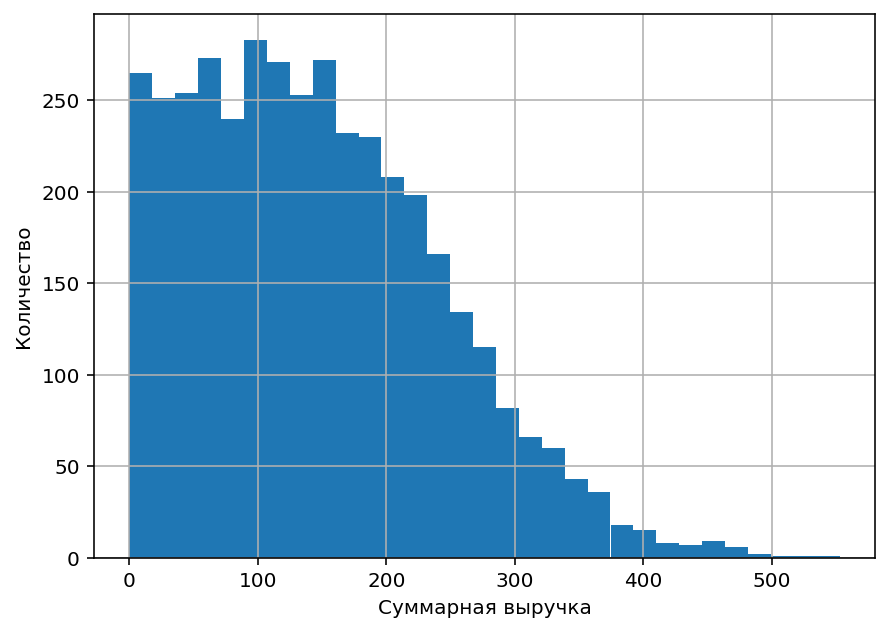

In [12]:
# ещё раз построим столбчатую диаграмму для суммарной выручки
plt.figure(figsize=(7, 5))
plt.hist(df['avg_additional_charges_total'], bins='auto')
plt.grid(which='major', axis='both')
plt.xlabel('Суммарная выручка')
plt.ylabel('Количество')
plt.show()

In [13]:
# посмотрим на строки, сумма заказов которых превышает 500
df.loc[df['avg_additional_charges_total'] > 500]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
975,0,0,1,0,1,12,1,32,552.590740,12.0,1,0.887859,0.939304,0
2394,0,0,0,0,1,6,1,32,515.392606,6.0,4,0.000000,0.000000,0
3799,1,0,0,0,1,1,1,31,534.256182,1.0,2,2.325128,2.267241,0


Всего **3** строки, с суммой заказа более **500**. Удалим данные строки, чтобы при использовании линейной модели выбросы "не перетянули" зависимость на себя.

In [14]:
# удалим строки с данными индексами
df.drop(df.index[[975, 2394, 3799]], inplace=True)

## Построение моделей прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак - факт оттока клиента в следующем месяце. Первоначально разобьем данные на обучающую и валидационную выборку.

In [15]:
# разделим наши данные на признаки 'матрица X и целевую переменную 'y'
X = df.drop(columns=['churn'])
y = df['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=0)

In [16]:
# стандартизируем данные на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [17]:
# создадим функцию, которая будет выводить метрики 'accuracy', 'precision' и 'recall' для наших моделей
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [18]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver='liblinear', random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.88
	Recall: 0.85


In [19]:
# зададим алгоритм для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1] # Ваш код здесь
# выведем метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.82


**Промежуточные выводы:**

- в обоих случаях показатель правильности прогнозирования более **90%**;
- показатели метрик **Precision** и **Recall** так же на высоком уровне;
- исследование показало, что модель логистической регрессии лучше показала себя на основании метрик.

## Кластеризация клиентов

### Определение количества кластеров

Первоначально стандартизируем данные и построим дендрограмму.

In [20]:
# стандартизируем данные перед работой с алгоритмом
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# сохраним в переменную 'linked' таблицу «связок» между объектами
linked = linkage(X_sc, method = 'ward')

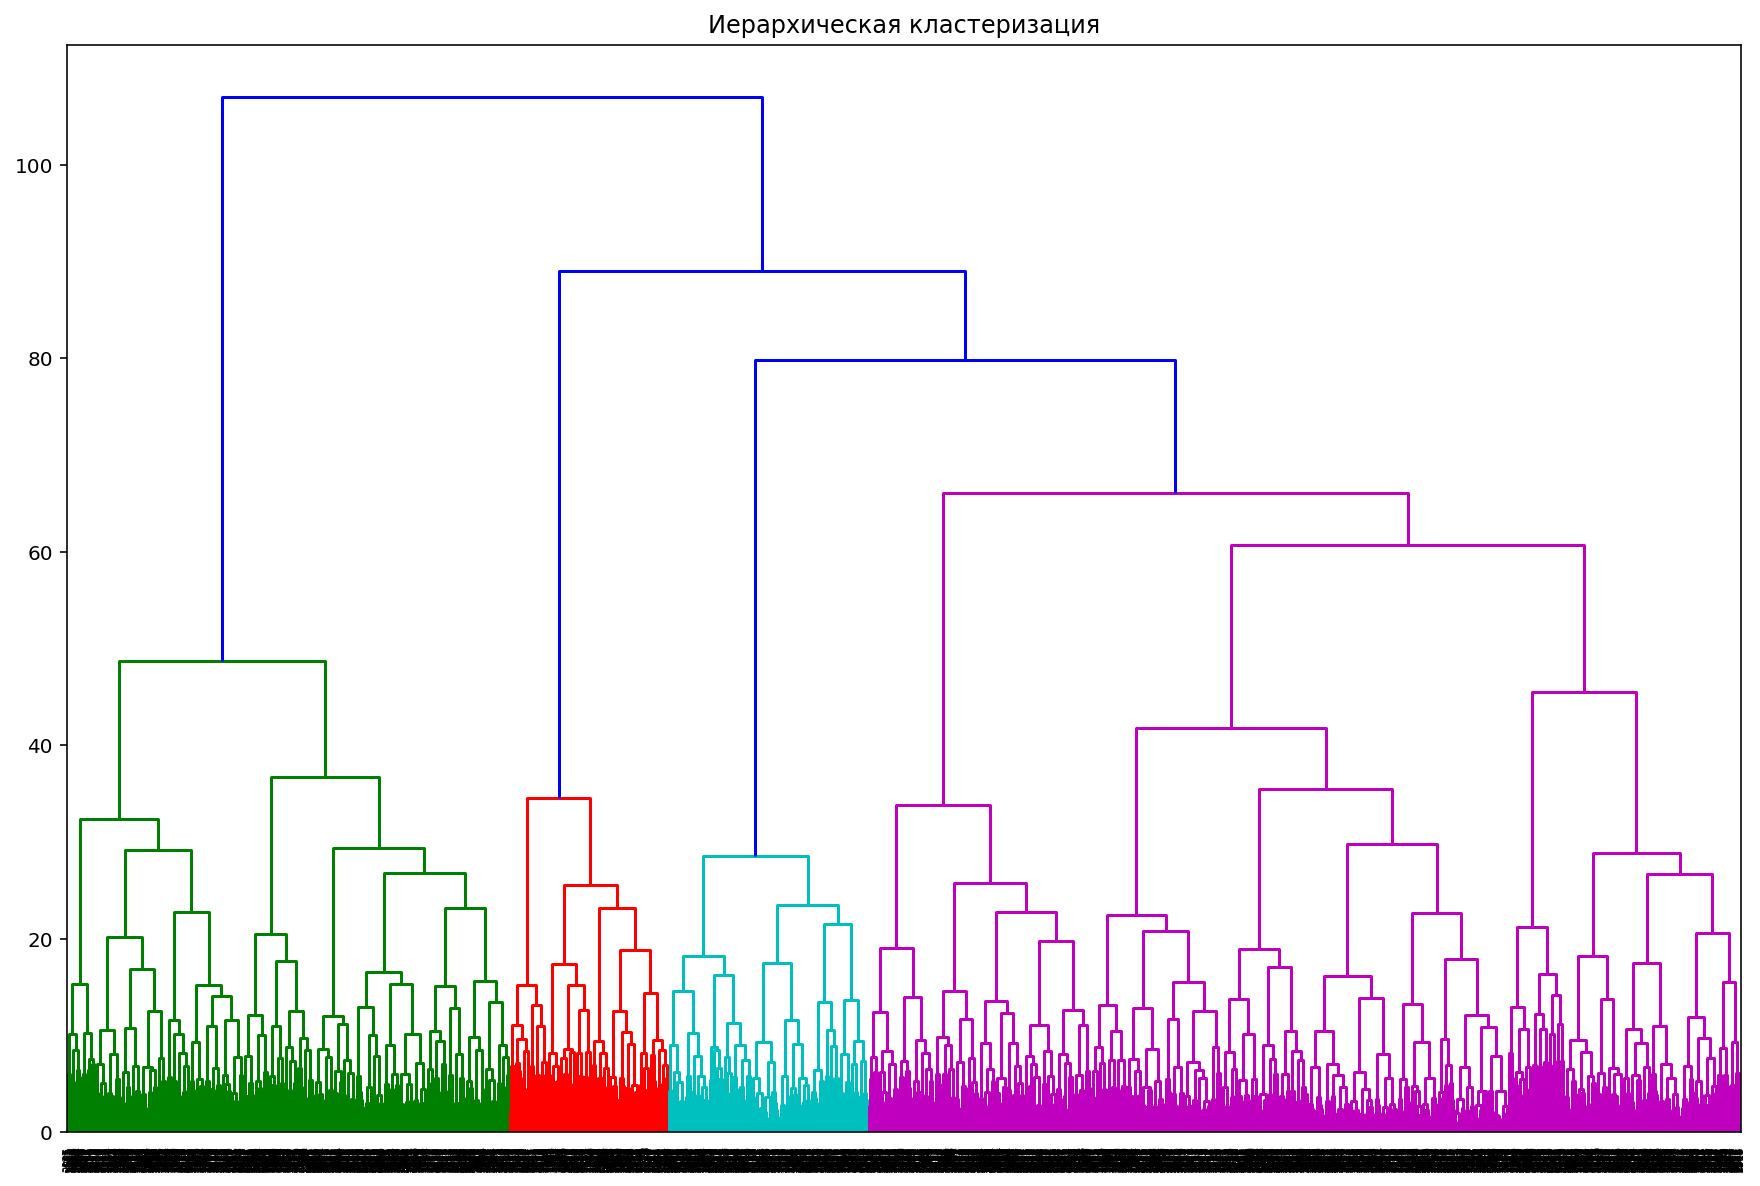

In [21]:
# построим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

Предложенное оптимальное число кластеров **4** — четыре разных цвета на графике.

### Обучение модели кластеризации

Обучим модель кластеризации на основании алгоритма **K-Means** и спрогнозируем кластеры клиентов. Согласно требованиям за число кластеров принимаем **n=5**.

In [22]:
km = KMeans(n_clusters = 5, random_state = 0) # задаём число кластеров, равное 
labels = km.fit_predict(df.drop(columns = ['churn'])) # применяем алгоритм к данным и формируем вектор кластеров
df['clusters'] = labels # добавим столбец с кластерами в нашу таблицу

df.head() # посмотрим

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,clusters
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,4
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,4
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,2


### Расчет метрики кластеризации

Посчитаем метрику силуэта для кластеризации пользователей.

In [23]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.01


Значение метрики оказалось не высоким. Для определения более явной структуры дополнительно проведем анализ получившихся кластеров.

### Анализ признаков кластеров

Первоначально сгруппируем таблицу, показывающую средние значения признаков для кластеров.

In [24]:
# сгруппируем
df.groupby('clusters').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
clusters,,,,,,,,,,,,,,
0,0.524544,0.879383,0.513324,0.347826,0.897616,5.388499,0.427770,29.338008,247.948626,4.998597,4.130435,1.918027,1.855601,0.176718
1,0.506823,0.825536,0.488304,0.293372,0.908382,4.196881,0.387914,28.914230,35.395961,3.852827,3.390838,1.839317,1.694899,0.349903
2,0.510482,0.843816,0.491614,0.314465,0.899371,4.737945,0.425577,29.384696,173.055969,4.361635,3.747379,1.887788,1.776813,0.234801
3,0.467128,0.861592,0.515571,0.342561,0.927336,5.761246,0.429066,29.837370,350.656641,5.311419,4.432526,2.001309,1.989125,0.055363
4,0.516256,0.840394,0.454187,0.281773,0.899507,4.308374,0.406897,28.967488,105.058012,3.999015,3.558621,1.851078,1.707442,0.331034


In [25]:
# посмотрим какое количество пользователей оказалось в каждой группе
df.groupby('clusters')['clusters'].agg('count')

clusters
0     713
1    1026
2     954
3     289
4    1015
Name: clusters, dtype: int64

**Промежуточные выводы:**

- средние значения столбца **avg_additional_charges_total** (суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон) в группах сильно различается. Минимальное (**35.39**) установлено в группе **1**, максимальное (**350.66**) установлено в группе **3**;
- также средние значения столбца **month_to_end_contract** (срок до окончания текущего действующего абонемента (в месяцах) отличается между группами на **1,5**;
- средние значения оттока имеются сильные различия между группами кластеров. Минимальное (**0.05**) установлено в группе **3**, максимальное (**0.35**) установлено в группе **1**;
- самая многочисленная группа **1** c **1026** пользователями, самая малочисленная группа **3** с **289** пользователями.

Для дискретных переменных построим столбчатые диаграммы.

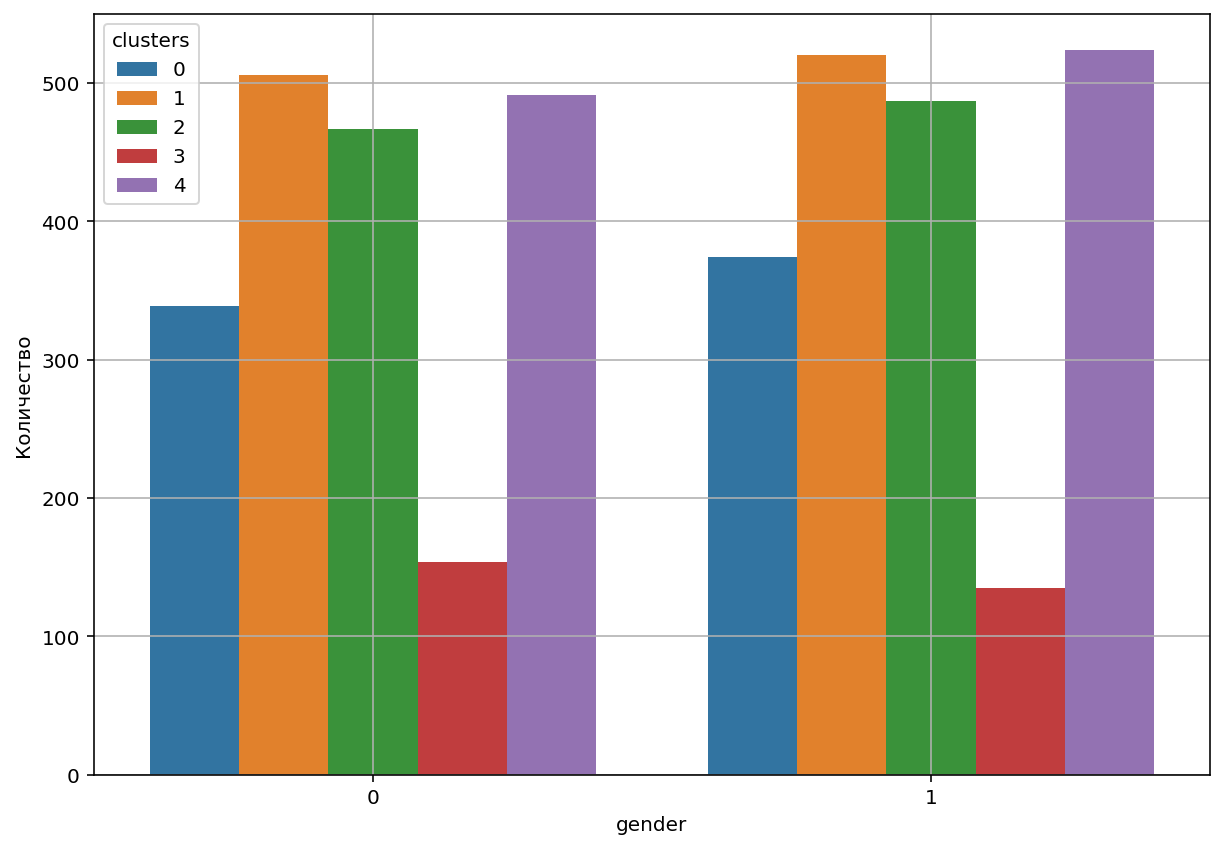

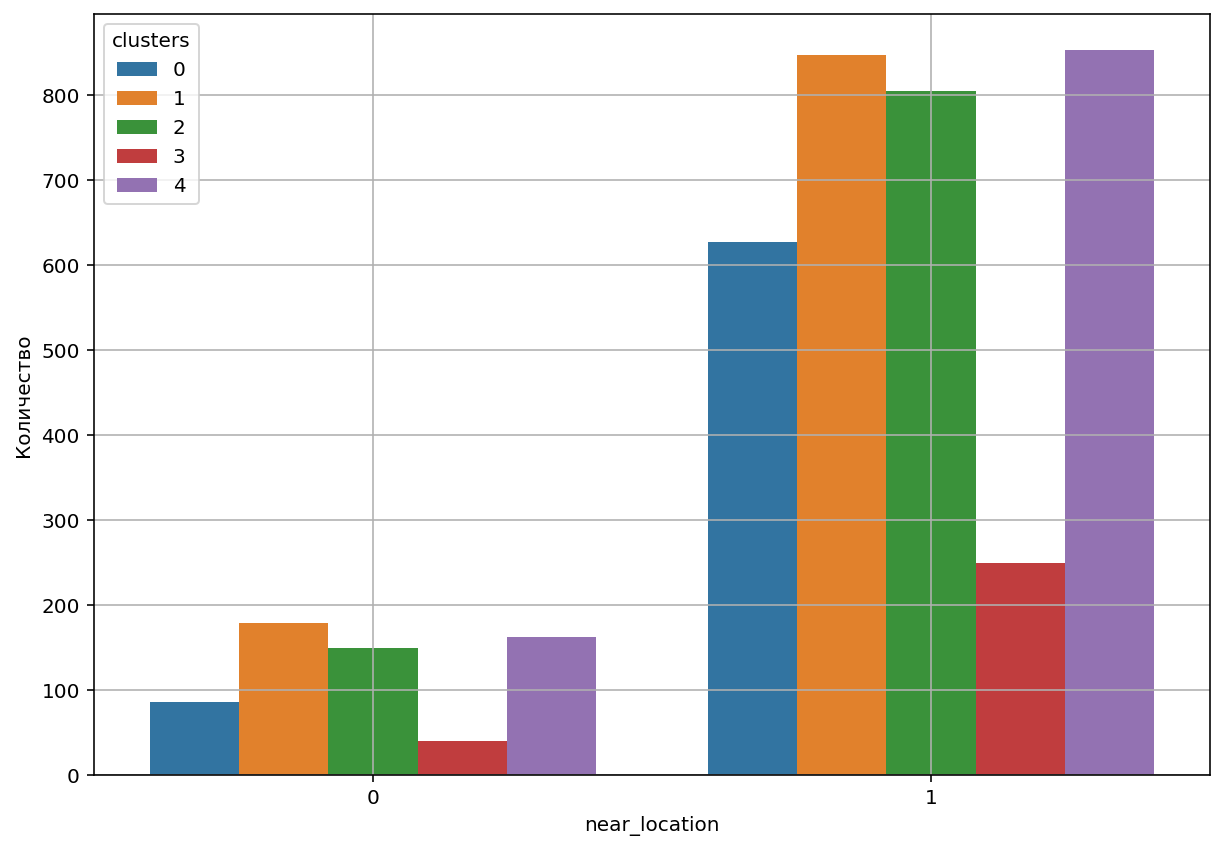

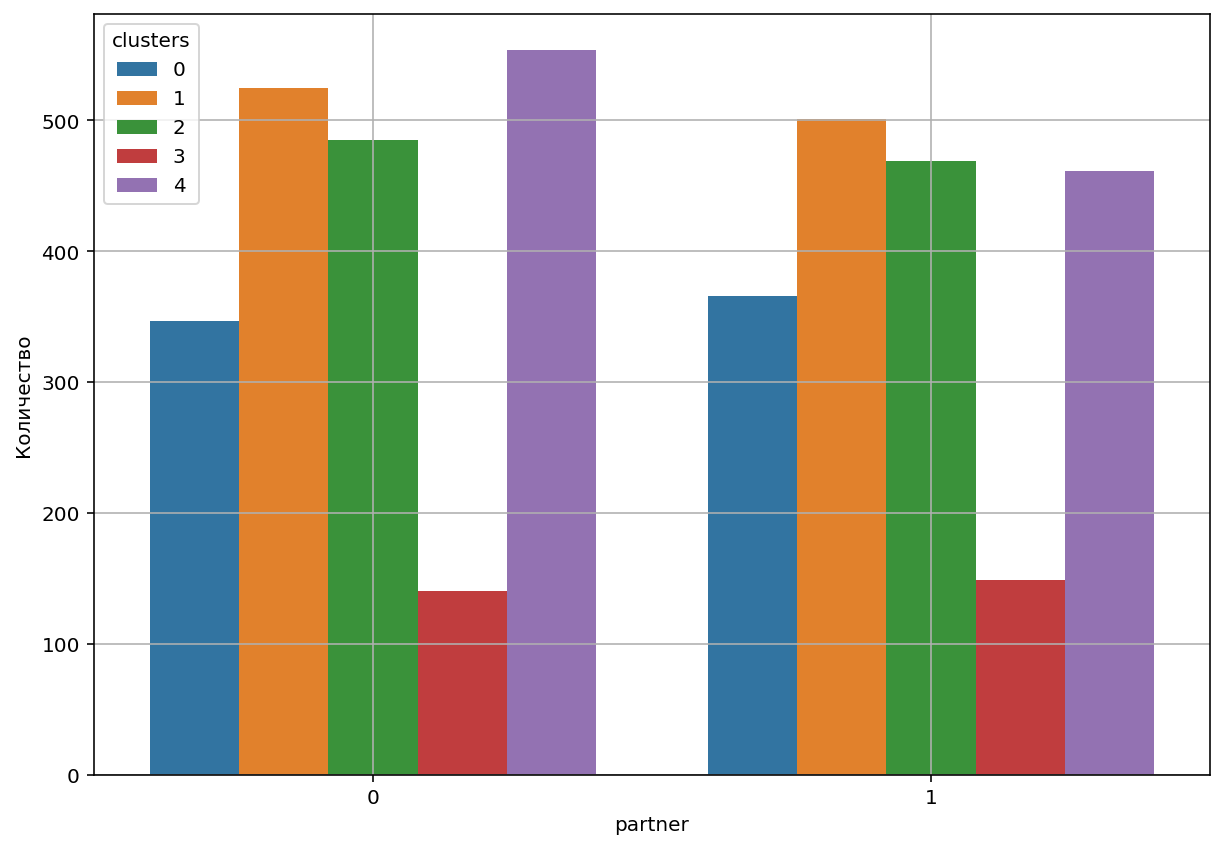

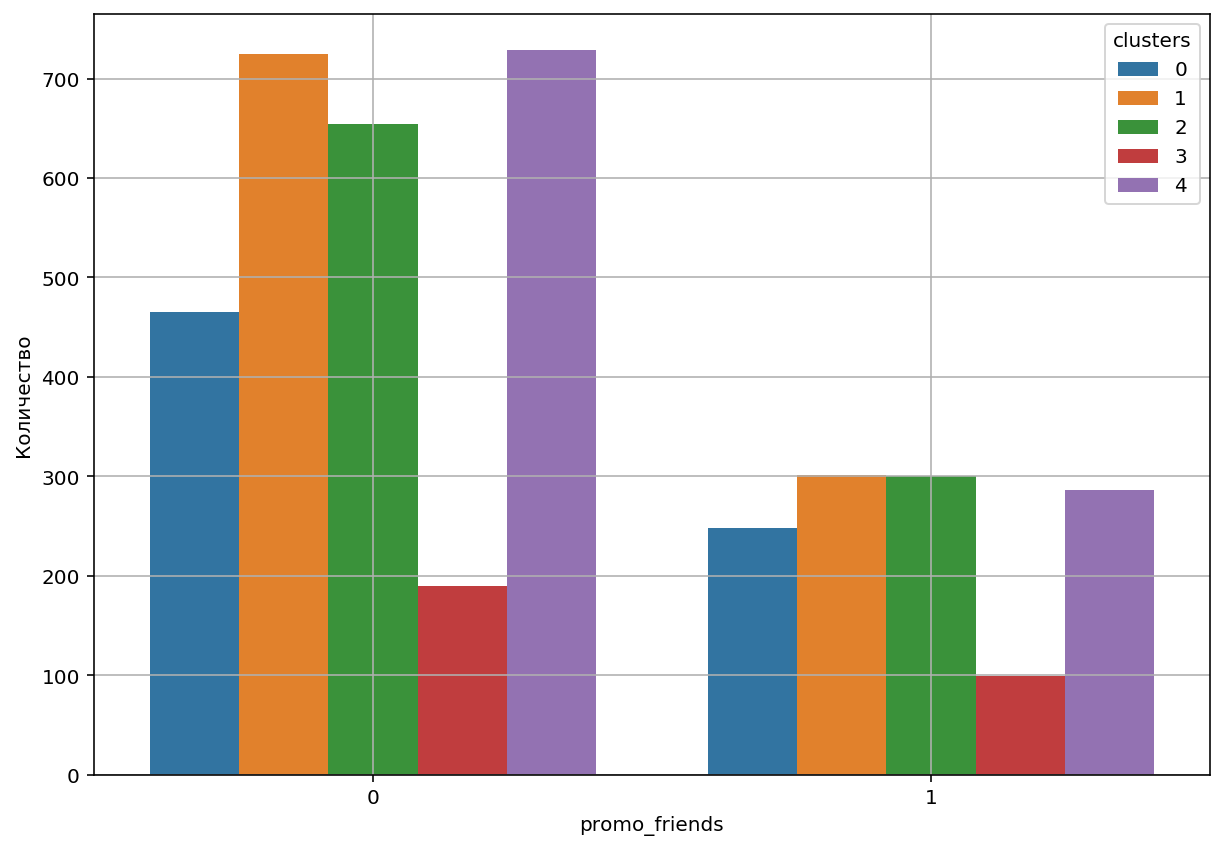

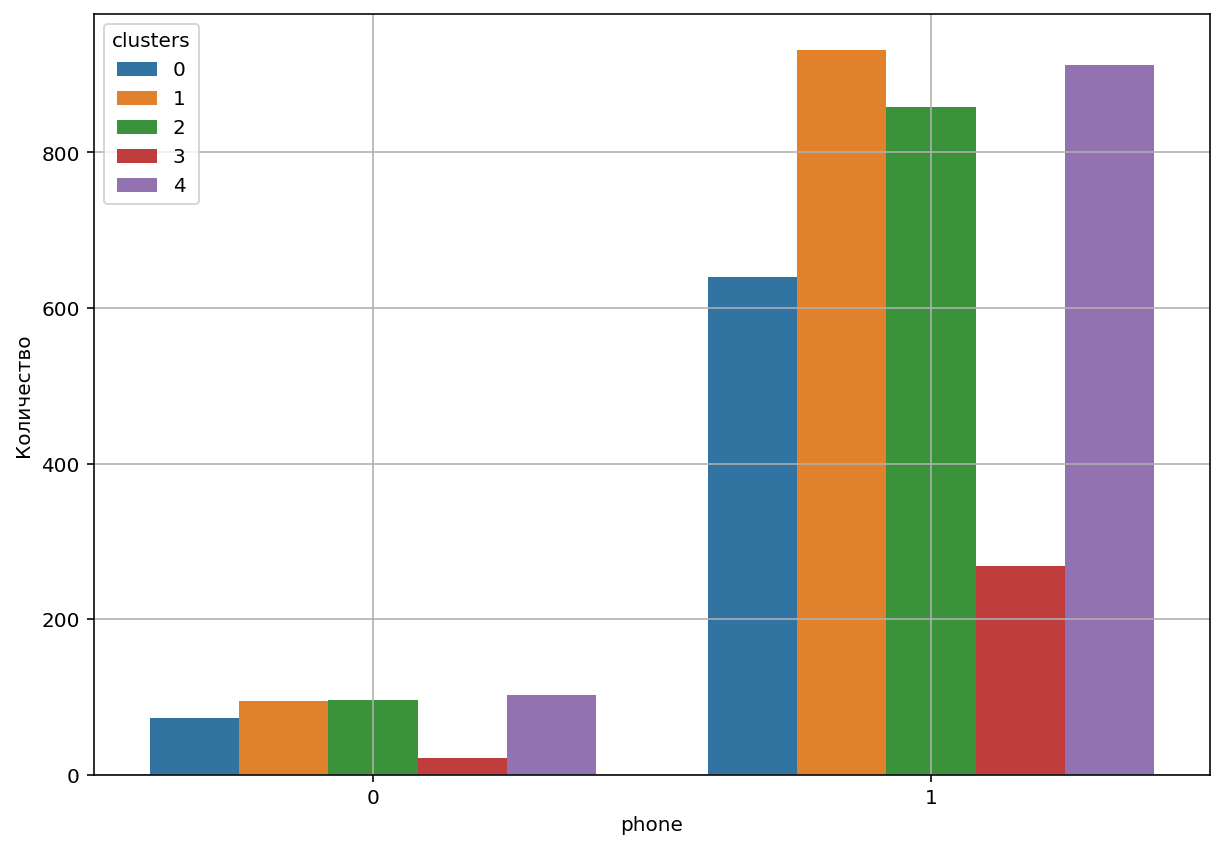

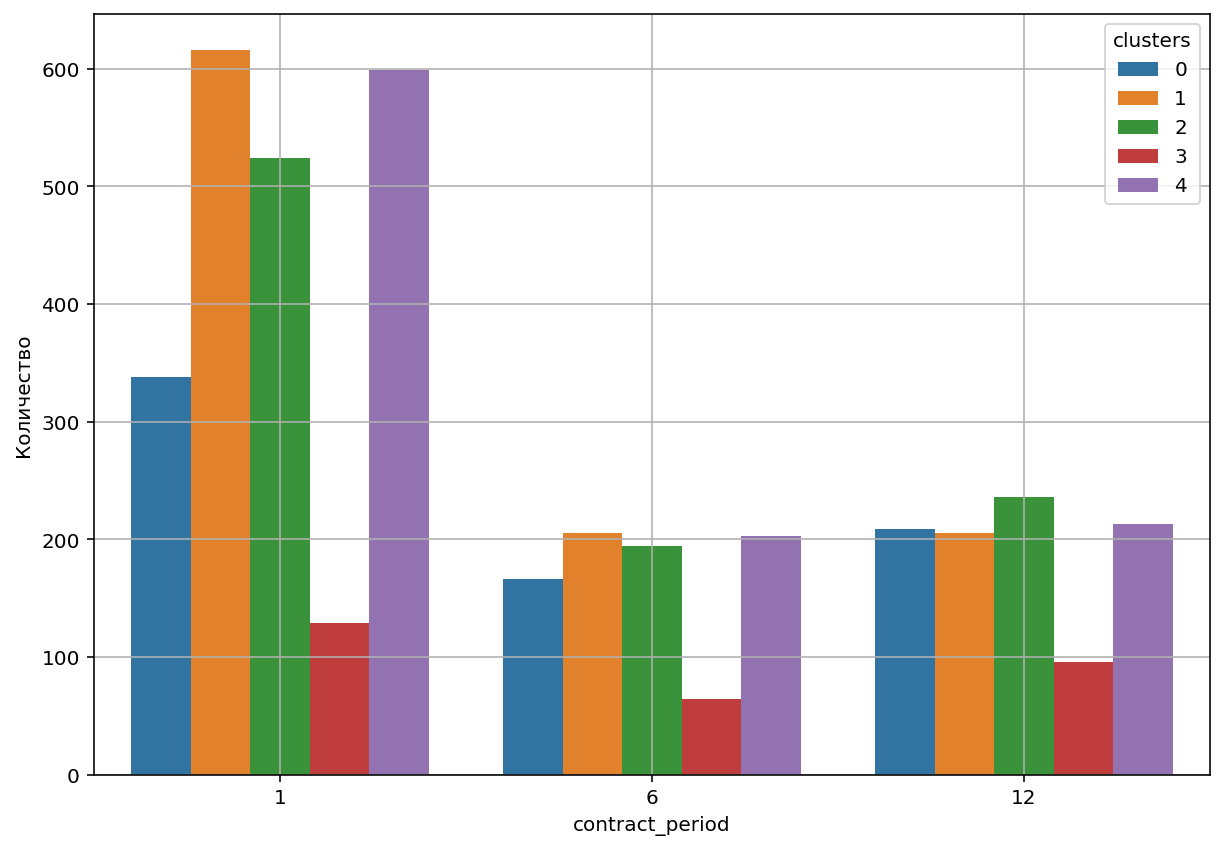

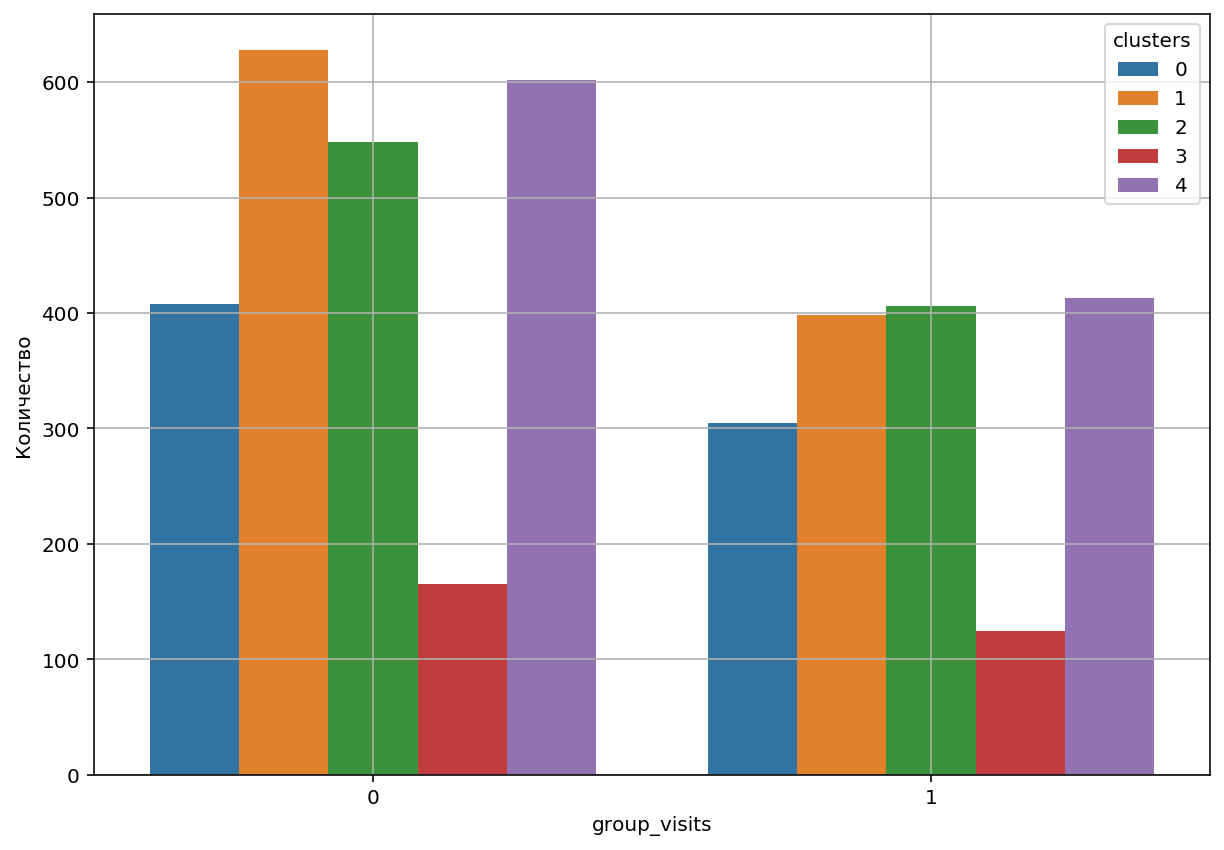

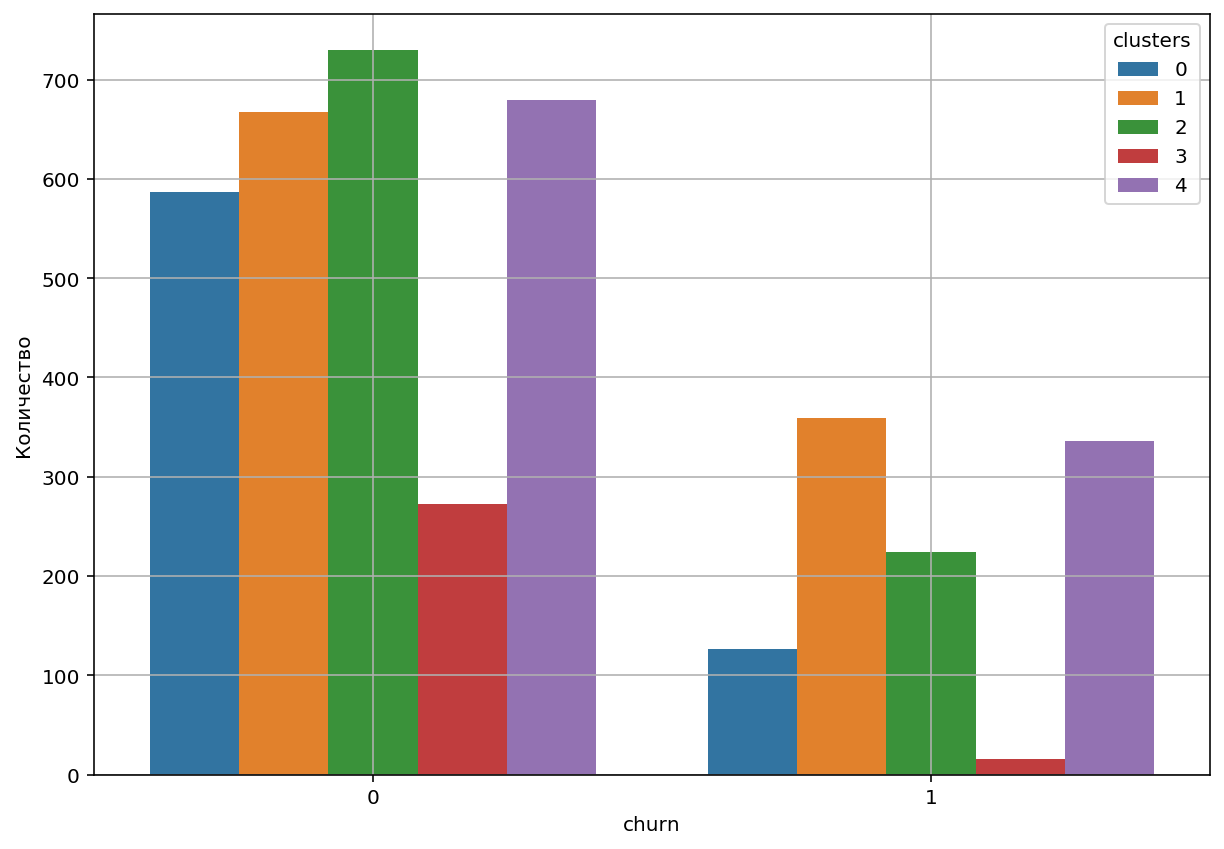

In [26]:
for col in df.drop(['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'clusters'], axis = 1).columns:
    plt.figure(figsize=(10, 7))
    sns.countplot(data = df, x = df[col], hue = 'clusters')
    plt.grid(which='major', axis='both')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.show()

Для непревывных переменных построим боксплот.

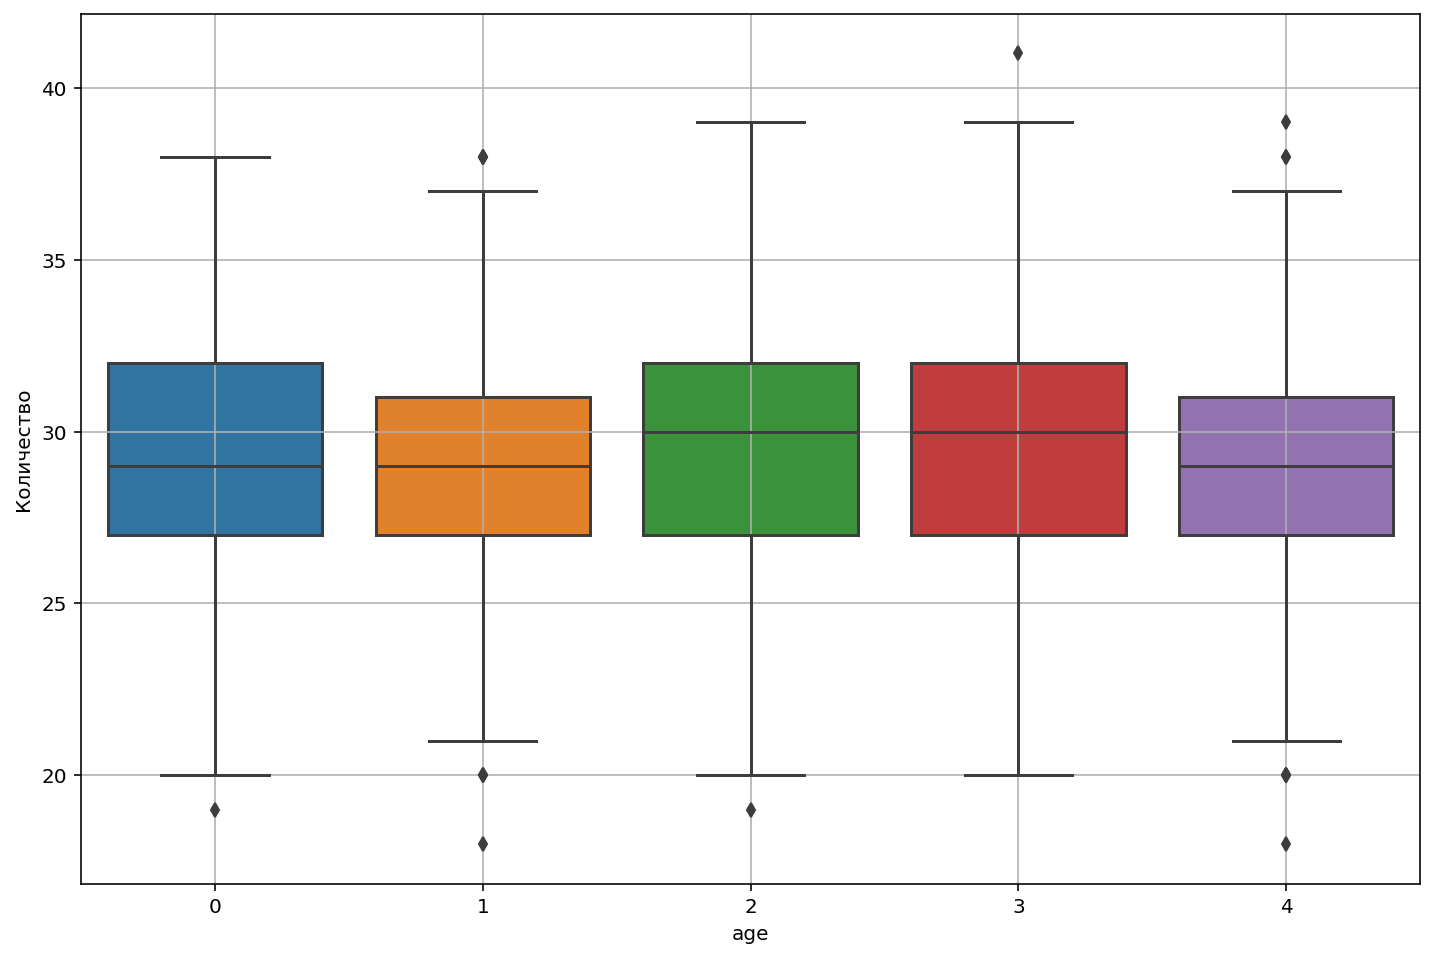

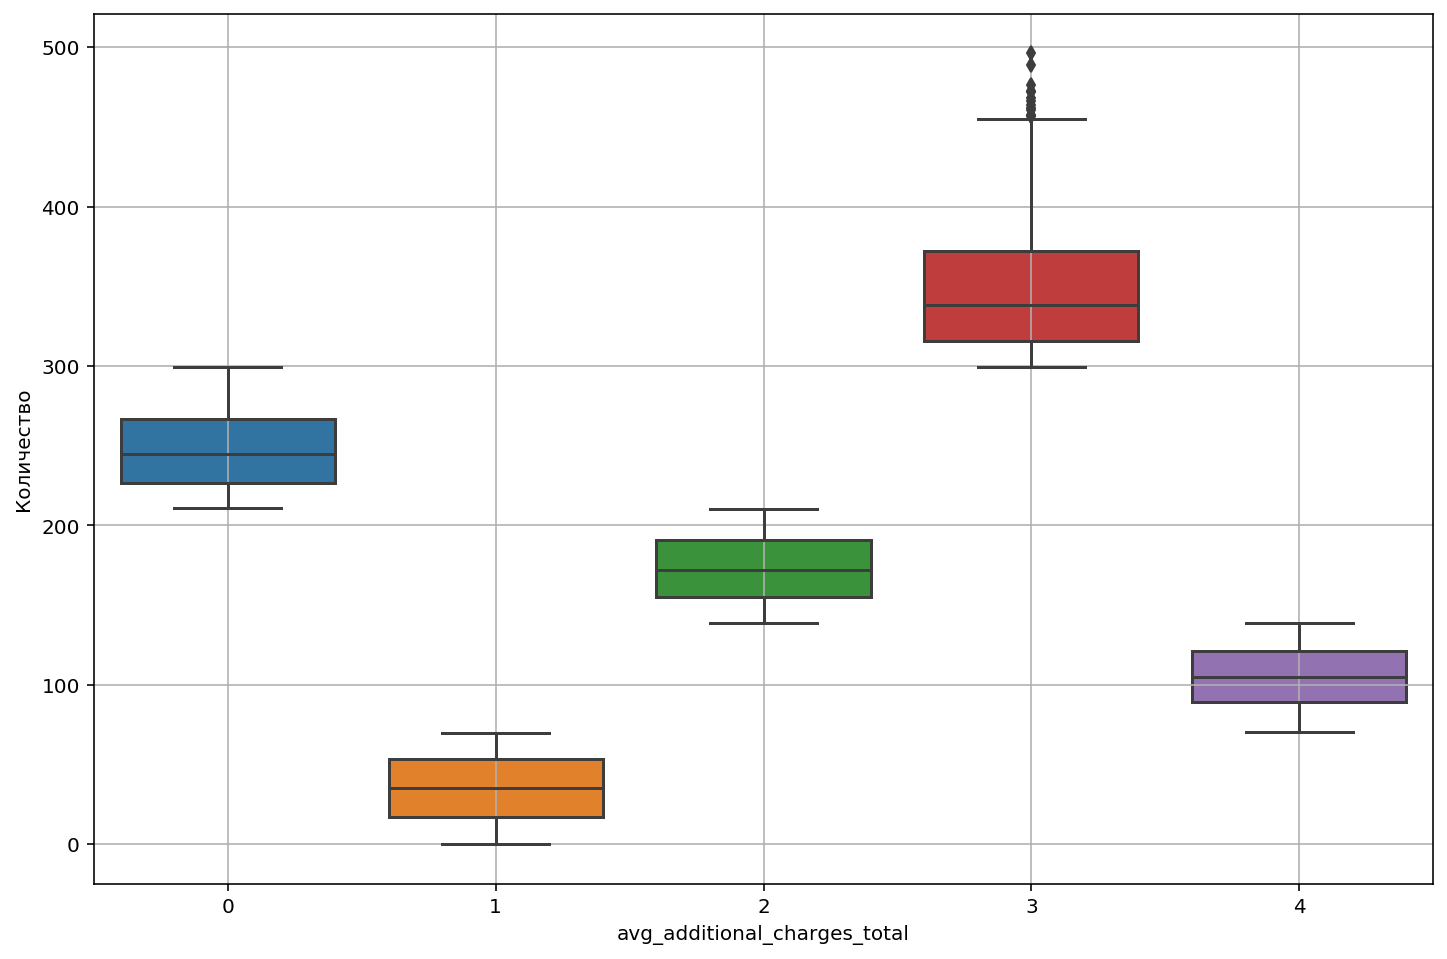

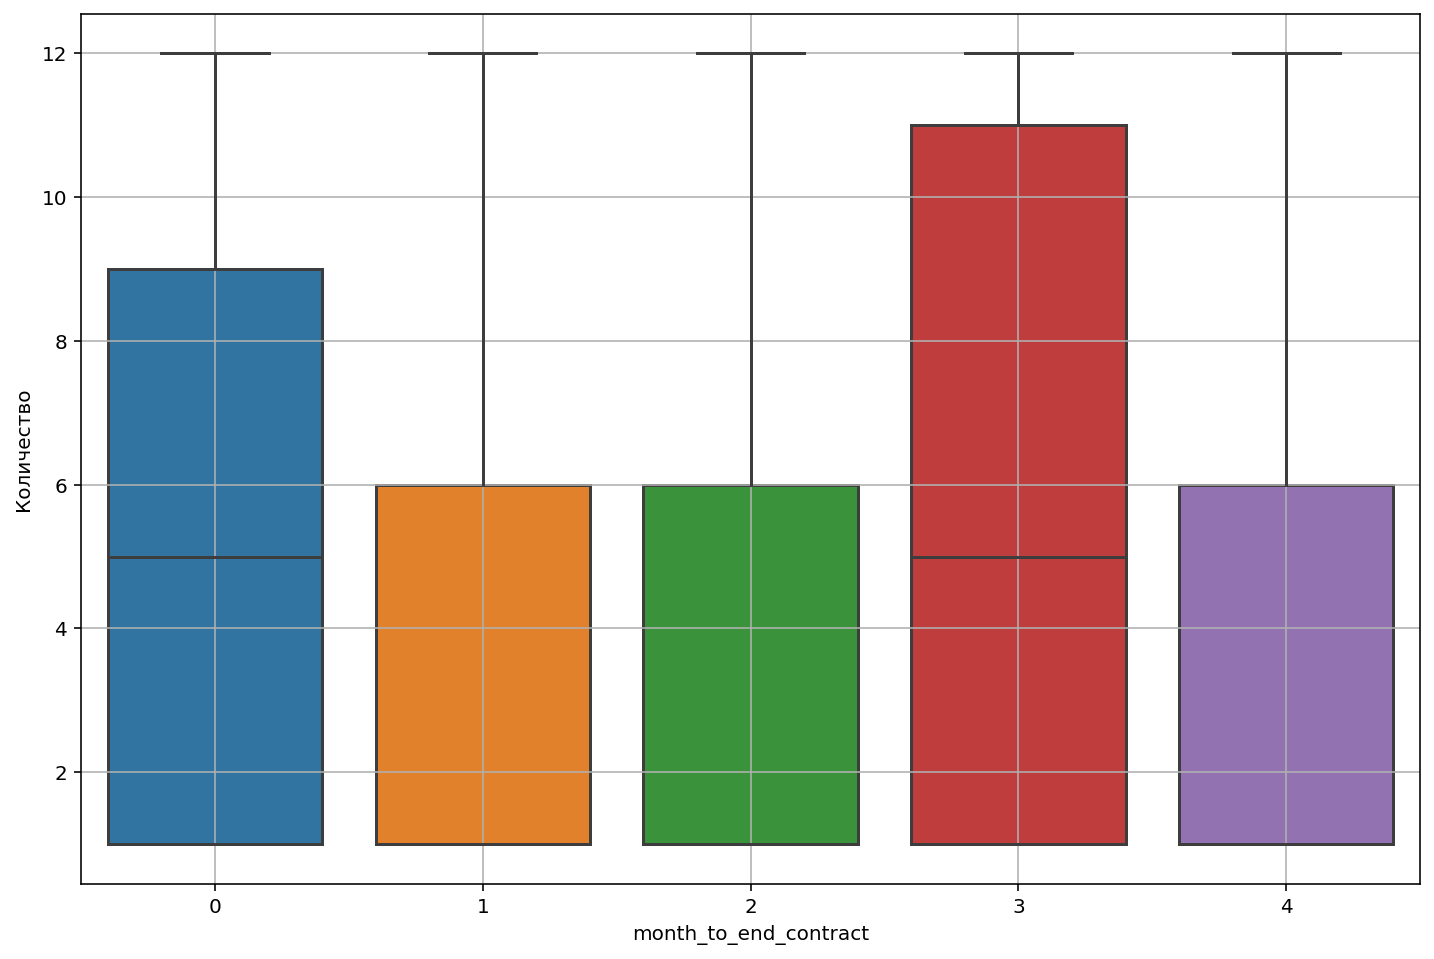

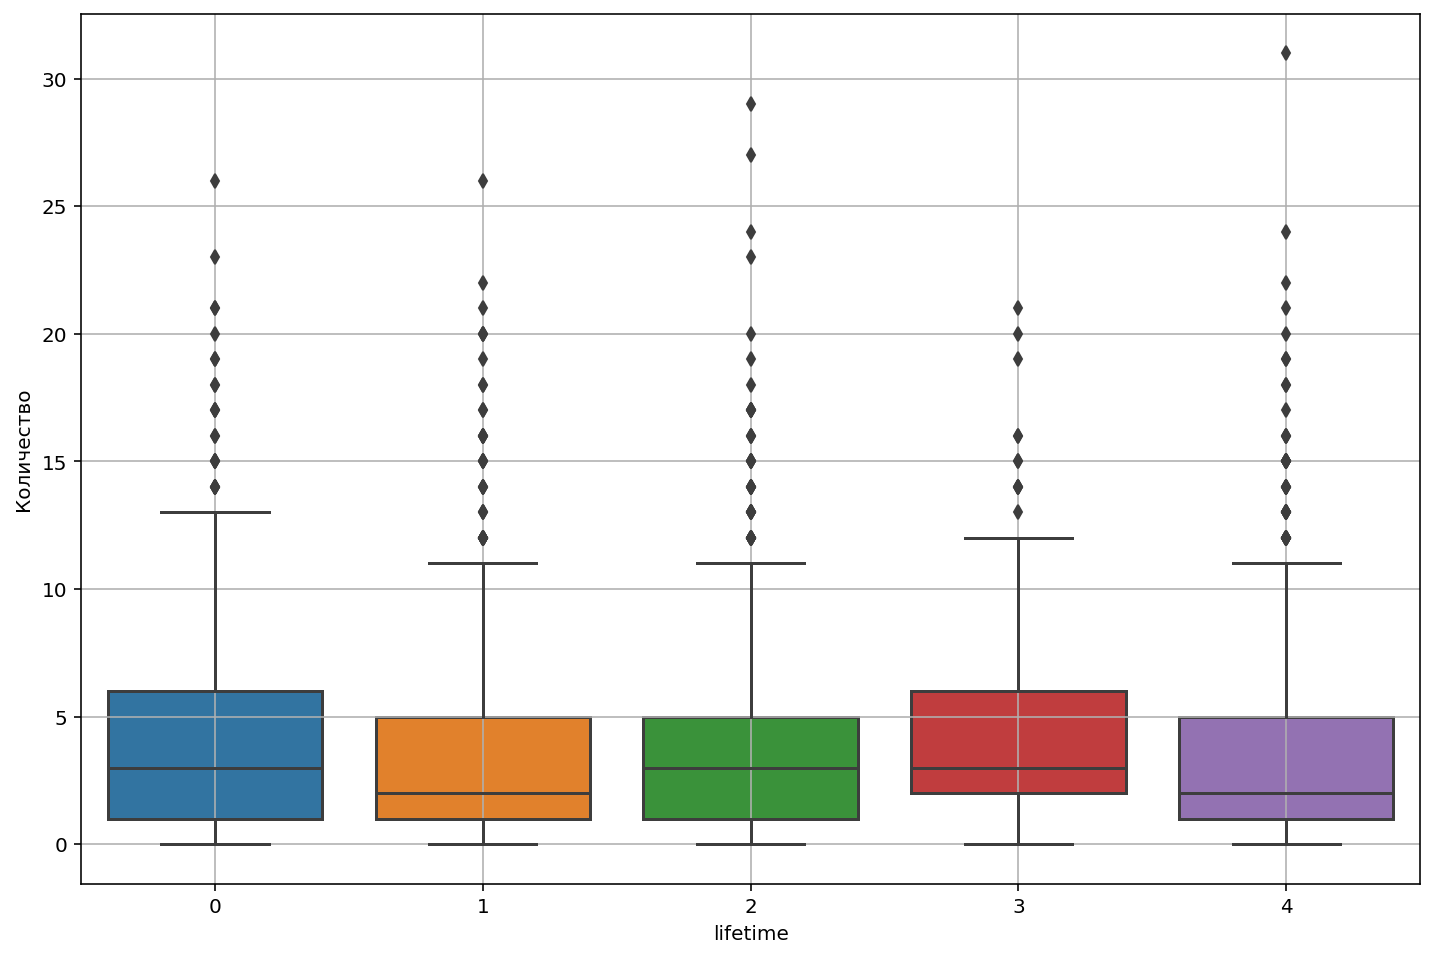

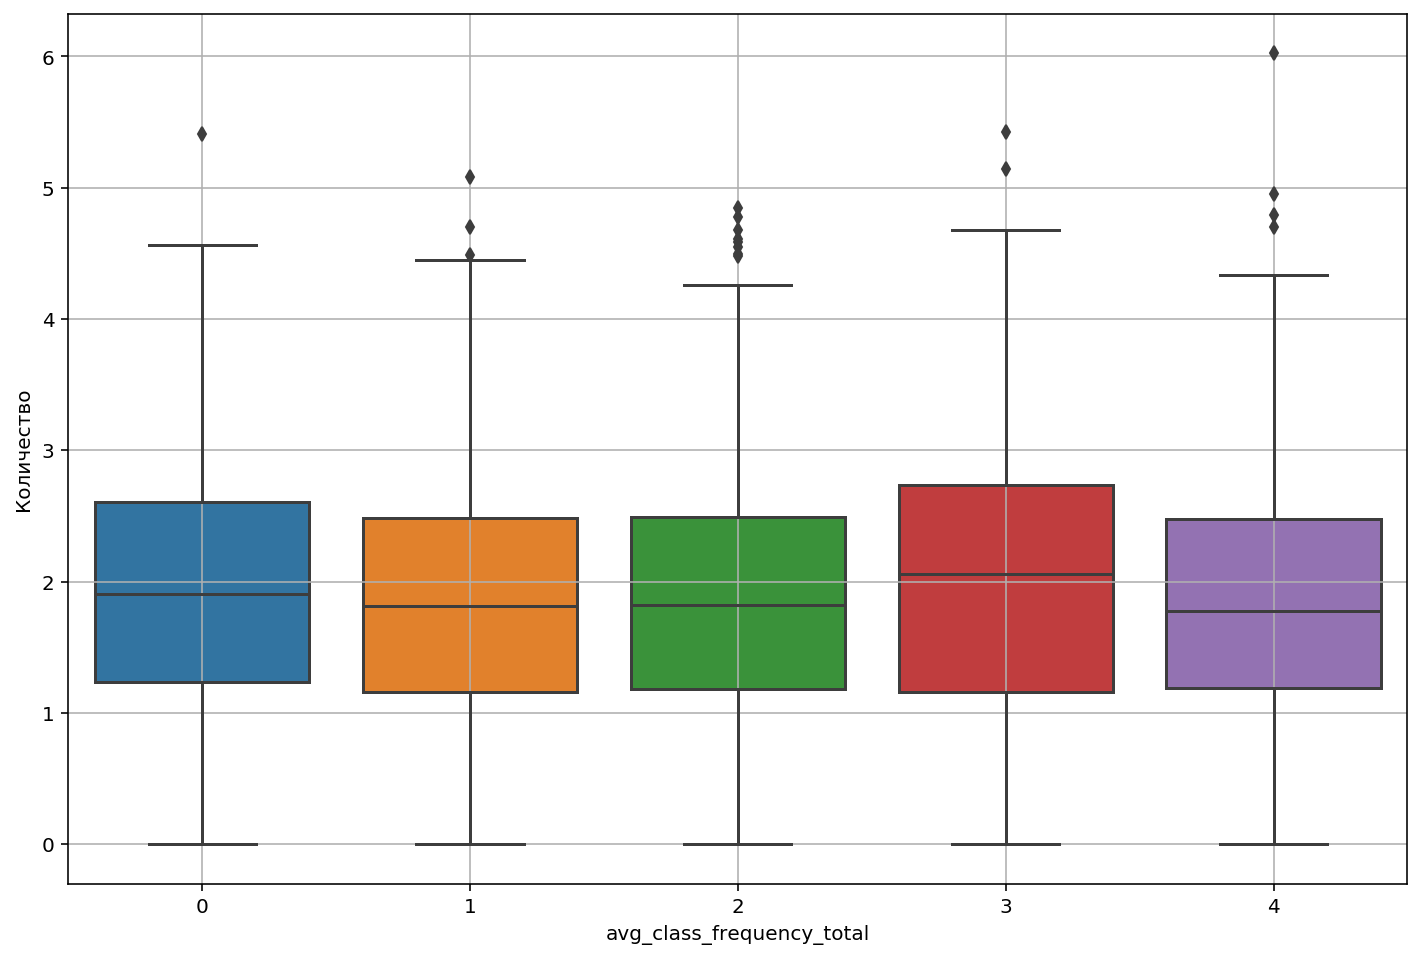

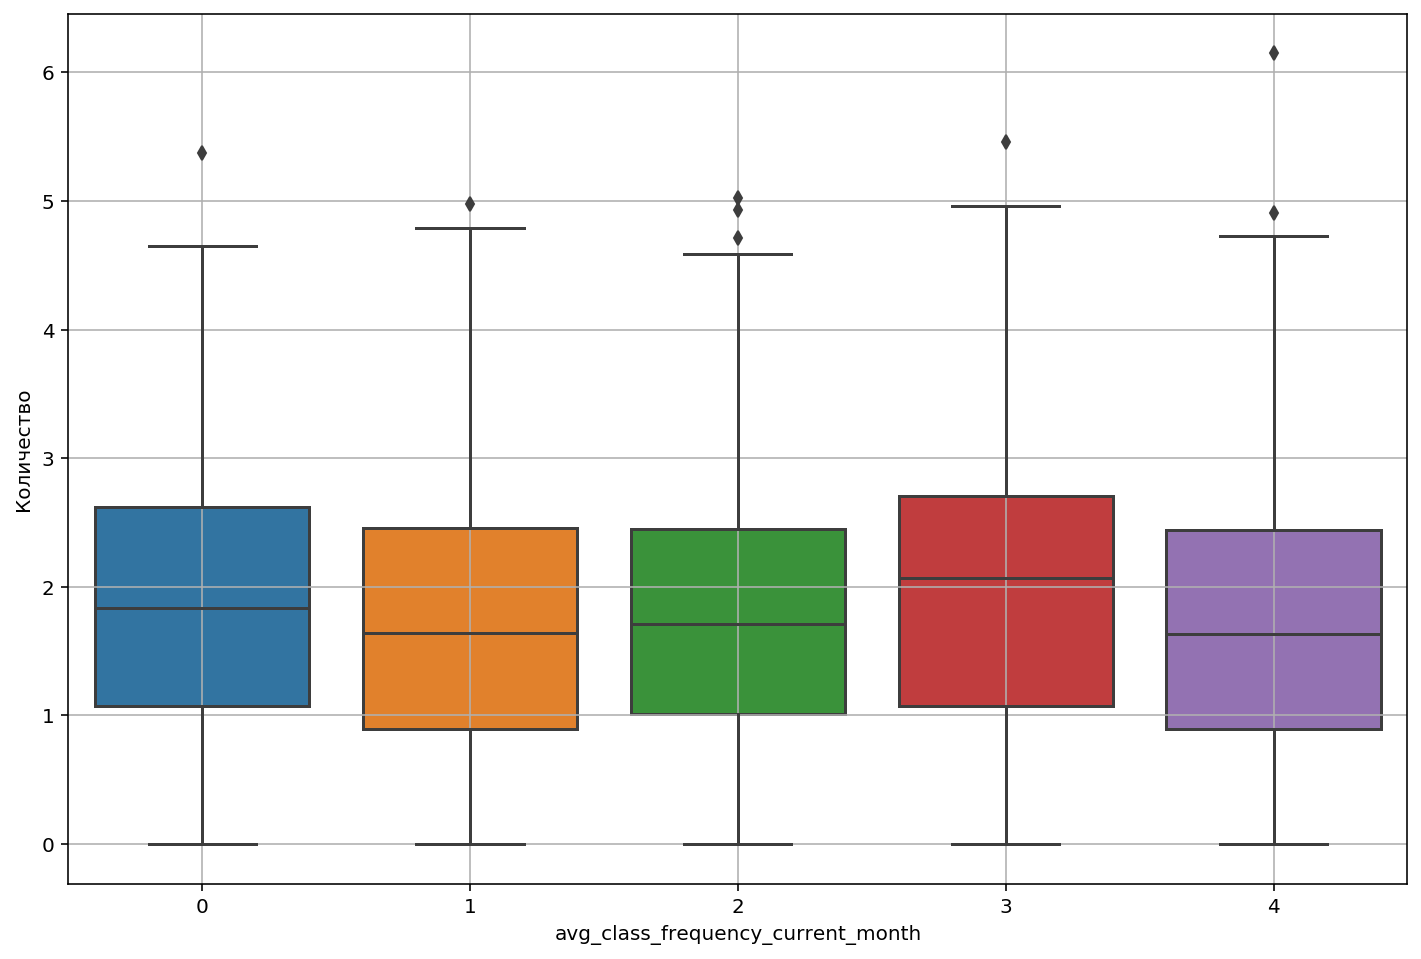

In [27]:
for col in df.drop(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn', 'clusters'], axis = 1).columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x ='clusters', y = df[col], data = df)
    plt.grid(which='major', axis='both')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.show()

**Промежуточные выводы:**

- в **3** группе преобладает гендерная отметка **0**, в остальных группах **1**;
- боксплот показали, что одним из важнейших критериев разбивки кластеров оказались значения **avg_additional_charges_total** (суммарная выручка от других услуг фитнес-центра). Группа **1**: диапазон **0-70**, группа **4**: диапазон **70-140**, **2**: **140-210**, **0**: **210-300**, **3**: **300+**.

Сгруппируем таблицу, чтобы посчитать долю оттока для каждого кластера.

In [28]:
# сгруппируем
df.groupby('clusters')['churn'].agg({'mean'})

,mean
clusters,
0,0.176718
1,0.349903
2,0.234801
3,0.055363
4,0.331034


**Промежуточные выводы:**

- самой надежной оказалась группа **2**, с долей оттока **0.05**;
- второе и третье места делят группы **3** и **1** с долями оттока **0.18** и **0.23** соответственно;
- самые плохие показатели за группами **4** и **0** с значениями **0.33** и **0.35**.

**Описание кластеров:**

- группы **0** и **3** - схожи между собой. Пользователи этих групп чаще всех живут или работают в одном районе, являются сотрудниками компании-партнера клуба и чаще других побывали участниками акции "приведи друга". Их средний возраст составляет 29 лет, и они немного чаще посещают занятия в неделю. Также данные группы потратили больше всех средств на дополнительные услуги фитнес-клуба и их показатели оттока наилучшие. Стоит отметить, что группа **0** единственная, где большинство пользователей соответствует гендерной принадлежности ноль;
- у пользователей группы **2** средние показатели проживания или работы в одном районе, членства в компании-партнера, участия в акции "приведи друга", трат на другие услуги фитнес-клуба и уровень оттока относительно других кластеров;
- группы **1** и **4** являются группами с наименьшими показателями. Они реже других живут или работают в одном районе, пользуются дополнительными услугами фитнес-центра и вероятнее быстрее всех заканчивают заниматься.

## Рекомендации

**Основные выводы:**

- пользователи с бо́льшой вероятностью продолжают заниматься, если их место проживание или работа находятся в одном районе с фитнес-центром, являются сотрудниками компании-партнера или поучаствовали в акции «приведи друга»;
- средний возраст пользователя составляет **29** лет;
- клиенты, которые продолжают заниматься приносят дополнительную прибыль от услуг фитнес-центра (кафе, спорттовары, косметический и массажный салоны);
- исследование показало, что модель логистической регрессии лучше показала себя относительно модели случайного леса;
- кластеризация выделила **4** основных группы.


**Для уменьшения оттока клиентов необходимо:**

- привлекать клиентов с гендерной принадлежностью **0**;
- активнее предлагать абонементы клиентам, проживание или работа которых находится в одном районе с фитнес-центром;
- вовлечение аудитории посредством компаний-партнера, или акции «приведи друга»;
- улучшать качество от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салоны.